#Importing Libraries and data


In [ ]:
! pip install arch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from arch import arch_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from scipy.stats import pearsonr

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
def parser(s):
    return datetime.strptime(s,'%Y-%m-%d')

In [ ]:
def parser2(s):
    return datetime.strptime(s,'%m-%d-%Y')

In [ ]:
def parser3(s):
    return datetime.strptime(s,'%d-%b-%Y')

In [ ]:
df=pd.read_csv('DEXINUS.csv',date_parser=parser,index_col=0)
df.head()

<ipython-input-221-0a96d563d7b6>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df=pd.read_csv('DEXINUS.csv',date_parser=parser,index_col=0)


,DEXINUS
observation_date,
2018-01-02,63.46
2018-01-03,63.50
2018-01-04,63.40
2018-01-05,63.38
2018-01-08,63.48


In [ ]:
df.shape

(1783, 1)

In [ ]:
df2=pd.read_csv('VIXCLS.csv',date_parser=parser,index_col=0,nrows=1783)
df2.head()

<ipython-input-223-39be01a8d4cd>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df2=pd.read_csv('VIXCLS.csv',date_parser=parser,index_col=0,nrows=1783)


,VIXCLS
observation_date,
2018-01-02,9.77
2018-01-03,9.15
2018-01-04,9.22
2018-01-05,9.22
2018-01-08,9.52


In [ ]:
df2.shape

(1783, 1)

In [ ]:
df=pd.merge(df2,df,how='inner',left_index=True,right_index=True)

In [ ]:
df.head()

,VIXCLS,DEXINUS
observation_date,,
2018-01-02,9.77,63.46
2018-01-03,9.15,63.50
2018-01-04,9.22,63.40
2018-01-05,9.22,63.38
2018-01-08,9.52,63.48


In [ ]:
df2=pd.read_csv('SP500.csv',date_parser=parser,index_col=0,nrows=1783)
df2.shape

<ipython-input-227-73018c3292cf>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df2=pd.read_csv('SP500.csv',date_parser=parser,index_col=0,nrows=1783)


(1783, 1)

In [ ]:
df2.shape

(1783, 1)

In [ ]:
df=pd.merge(df2,df,how='inner',left_index=True,right_index=True)

In [ ]:
df.head()

,SP500,VIXCLS,DEXINUS
observation_date,,,
2018-01-02,2695.81,9.77,63.46
2018-01-03,2713.06,9.15,63.50
2018-01-04,2723.99,9.22,63.40
2018-01-05,2743.15,9.22,63.38
2018-01-08,2747.71,9.52,63.48


In [ ]:
df.shape

(1783, 3)

In [ ]:
df.tail()

,SP500,VIXCLS,DEXINUS
observation_date,,,
2024-10-25,5808.12,20.33,84.06
2024-10-28,5823.52,19.80,84.05
2024-10-29,5832.92,19.34,84.04
2024-10-30,5813.67,20.35,84.07
2024-10-31,5705.45,23.16,84.06


In [ ]:
df2=pd.read_csv('Oil.csv',date_parser=parser2,index_col=0)
df2.shape

<ipython-input-233-eb0e62ad66b5>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df2=pd.read_csv('Oil.csv',date_parser=parser2,index_col=0)


(1711, 1)

In [ ]:
df2.head()

,Cushing OK WTI Spot Price FOB Dollars per Barrel
Day,
2018-01-02,60.37
2018-01-03,61.61
2018-01-04,61.98
2018-01-05,61.49
2018-01-08,61.73


In [ ]:
df.shape

(1783, 3)

In [ ]:
df=pd.merge(df2,df,how='outer',left_index=True,right_index=True)

In [ ]:
df.head()

,Cushing OK WTI Spot Price FOB Dollars per Barrel,SP500,VIXCLS,DEXINUS
2018-01-02,60.37,2695.81,9.77,63.46
2018-01-03,61.61,2713.06,9.15,63.50
2018-01-04,61.98,2723.99,9.22,63.40
2018-01-05,61.49,2743.15,9.22,63.38
2018-01-08,61.73,2747.71,9.52,63.48


In [ ]:
df.shape

(1783, 4)

In [ ]:
df.tail()

,Cushing OK WTI Spot Price FOB Dollars per Barrel,SP500,VIXCLS,DEXINUS
2024-10-25,72.02,5808.12,20.33,84.06
2024-10-28,67.65,5823.52,19.80,84.05
2024-10-29,67.48,5832.92,19.34,84.04
2024-10-30,68.91,5813.67,20.35,84.07
2024-10-31,69.58,5705.45,23.16,84.06


In [ ]:
df.isna().sum()

,0
Cushing OK WTI Spot Price FOB Dollars per Barrel,72
SP500,63
VIXCLS,45
DEXINUS,76


In [ ]:
d1=pd.read_csv('NIFTY 50-01-01-2018-to-01-01-2019.csv',date_parser=parser3,index_col=0)
d1.columns = [x.strip() for x in d1.columns]
d1.drop(columns=['Open','High','Low','Shares Traded','Turnover (₹ Cr)'],inplace=True)
d1.head()

<ipython-input-241-7c5dbac97006>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  d1=pd.read_csv('NIFTY 50-01-01-2018-to-01-01-2019.csv',date_parser=parser3,index_col=0)


,Close
Date,
2018-01-01,10435.55
2018-01-02,10442.20
2018-01-03,10443.20
2018-01-04,10504.80
2018-01-05,10558.85


In [ ]:
d2=pd.read_csv('NIFTY 50-02-01-2019-to-31-12-2019.csv',date_parser=parser3,index_col=0)
d2.columns = [x.strip() for x in d2.columns]
d2.drop(columns=['Open','High','Low','Shares Traded','Turnover (₹ Cr)'],inplace=True)
d2.head()

<ipython-input-242-87e96f69a98b>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  d2=pd.read_csv('NIFTY 50-02-01-2019-to-31-12-2019.csv',date_parser=parser3,index_col=0)


,Close
Date,
2019-01-02,10792.50
2019-01-03,10672.25
2019-01-04,10727.35
2019-01-07,10771.80
2019-01-08,10802.15


In [ ]:
d2.shape,d1.shape

((244, 1), (247, 1))

In [ ]:
d1=pd.concat([d1,d2],axis=0)
d1.shape

(491, 1)

In [ ]:
d2=pd.read_csv('NIFTY 50-01-01-2020-to-31-12-2020.csv',date_parser=parser3,index_col=0)
d2.columns = [x.strip() for x in d2.columns]
d2.drop(columns=['Open','High','Low','Shares Traded','Turnover (₹ Cr)'],inplace=True)
d2.head()

<ipython-input-245-73d3e196e63e>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  d2=pd.read_csv('NIFTY 50-01-01-2020-to-31-12-2020.csv',date_parser=parser3,index_col=0)


,Close
Date,
2020-01-01,12182.50
2020-01-02,12282.20
2020-01-03,12226.65
2020-01-06,11993.05
2020-01-07,12052.95


In [ ]:
d1=pd.concat([d1,d2],axis=0)
d1.shape

(743, 1)

In [ ]:
d2=pd.read_csv('NIFTY 50-01-01-2021-to-31-12-2021.csv',date_parser=parser3,index_col=0)
d2.columns = [x.strip() for x in d2.columns]
d2.drop(columns=['Open','High','Low','Shares Traded','Turnover (₹ Cr)'],inplace=True)
d2.head()

<ipython-input-247-9a089f5b79e7>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  d2=pd.read_csv('NIFTY 50-01-01-2021-to-31-12-2021.csv',date_parser=parser3,index_col=0)


,Close
Date,
2021-01-01,14018.50
2021-01-04,14132.90
2021-01-05,14199.50
2021-01-06,14146.25
2021-01-07,14137.35


In [ ]:
d1=pd.concat([d1,d2],axis=0)
d1.shape

(991, 1)

In [ ]:
d2=pd.read_csv('NIFTY 50-01-01-2022-to-31-12-2022.csv',date_parser=parser3,index_col=0)
d2.columns = [x.strip() for x in d2.columns]
d2.drop(columns=['Open','High','Low','Shares Traded','Turnover (₹ Cr)'],inplace=True)
d2.head()

<ipython-input-249-5a629c0ed292>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  d2=pd.read_csv('NIFTY 50-01-01-2022-to-31-12-2022.csv',date_parser=parser3,index_col=0)


,Close
Date,
2022-01-03,17625.70
2022-01-04,17805.25
2022-01-05,17925.25
2022-01-06,17745.90
2022-01-07,17812.70


In [ ]:
d1=pd.concat([d1,d2],axis=0)
d1.shape

(1239, 1)

In [ ]:
d2=pd.read_csv('NIFTY 50-01-01-2023-to-31-12-2023.csv',date_parser=parser3,index_col=0)
d2.columns = [x.strip() for x in d2.columns]
d2.drop(columns=['Open','High','Low','Shares Traded','Turnover (₹ Cr)'],inplace=True)
d2.head()

<ipython-input-251-6e486aed75c2>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  d2=pd.read_csv('NIFTY 50-01-01-2023-to-31-12-2023.csv',date_parser=parser3,index_col=0)


,Close
Date,
2023-01-02,18197.45
2023-01-03,18232.55
2023-01-04,18042.95
2023-01-05,17992.15
2023-01-06,17859.45


In [ ]:
d1=pd.concat([d1,d2],axis=0)
d1.shape

(1485, 1)

In [ ]:
d2=pd.read_csv('NIFTY 50-01-01-2024-to-30-12-2024.csv',date_parser=parser3,index_col=0)
d2.columns = [x.strip() for x in d2.columns]
d2.drop(columns=['Open','High','Low','Shares Traded','Turnover (₹ Cr)'],inplace=True)
d2.head()

<ipython-input-253-4f656a70534e>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  d2=pd.read_csv('NIFTY 50-01-01-2024-to-30-12-2024.csv',date_parser=parser3,index_col=0)


,Close
Date,
2024-01-01,21741.90
2024-01-02,21665.80
2024-01-03,21517.35
2024-01-04,21658.60
2024-01-05,21710.80


In [ ]:
d1=pd.concat([d1,d2],axis=0)
d1.shape

(1694, 1)

In [ ]:
d1.head()

,Close
Date,
2018-01-01,10435.55
2018-01-02,10442.20
2018-01-03,10443.20
2018-01-04,10504.80
2018-01-05,10558.85


In [ ]:
df2=d1.copy()

In [ ]:
df2.isna().sum()

,0
Close,0


In [ ]:
df=pd.merge(df2,df,how='outer',left_index=True,right_index=True)

In [ ]:
df.head()

,Close,Cushing OK WTI Spot Price FOB Dollars per Barrel,SP500,VIXCLS,DEXINUS
2018-01-01,10435.55,NaN,NaN,NaN,NaN
2018-01-02,10442.20,60.37,2695.81,9.77,63.46
2018-01-03,10443.20,61.61,2713.06,9.15,63.50
2018-01-04,10504.80,61.98,2723.99,9.22,63.40
2018-01-05,10558.85,61.49,2743.15,9.22,63.38


In [ ]:
df.shape

(1791, 5)

In [ ]:
df.tail()

,Close,Cushing OK WTI Spot Price FOB Dollars per Barrel,SP500,VIXCLS,DEXINUS
2024-10-25,24180.80,72.02,5808.12,20.33,84.06
2024-10-28,24339.15,67.65,5823.52,19.80,84.05
2024-10-29,24466.85,67.48,5832.92,19.34,84.04
2024-10-30,24340.85,68.91,5813.67,20.35,84.07
2024-10-31,24205.35,69.58,5705.45,23.16,84.06


In [ ]:
df.isna().sum()

,0
Close,97
Cushing OK WTI Spot Price FOB Dollars per Barrel,80
SP500,71
VIXCLS,53
DEXINUS,84


In [ ]:
d1.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12',
               ...
               '2024-10-18', '2024-10-21', '2024-10-22', '2024-10-23',
               '2024-10-24', '2024-10-25', '2024-10-28', '2024-10-29',
               '2024-10-30', '2024-10-31'],
              dtype='datetime64[ns]', name='Date ', length=1694, freq=None)

In [ ]:
df.dropna(inplace=True)
df.shape

(1613, 5)

In [ ]:
df.head()

,Close,Cushing OK WTI Spot Price FOB Dollars per Barrel,SP500,VIXCLS,DEXINUS
2018-01-02,10442.20,60.37,2695.81,9.77,63.46
2018-01-03,10443.20,61.61,2713.06,9.15,63.50
2018-01-04,10504.80,61.98,2723.99,9.22,63.40
2018-01-05,10558.85,61.49,2743.15,9.22,63.38
2018-01-08,10623.60,61.73,2747.71,9.52,63.48


In [ ]:
df.columns=['Nifty50','Oil','Sp500','vix','exc_rate']
df.head()

,Nifty50,Oil,Sp500,vix,exc_rate
2018-01-02,10442.20,60.37,2695.81,9.77,63.46
2018-01-03,10443.20,61.61,2713.06,9.15,63.50
2018-01-04,10504.80,61.98,2723.99,9.22,63.40
2018-01-05,10558.85,61.49,2743.15,9.22,63.38
2018-01-08,10623.60,61.73,2747.71,9.52,63.48


#Visualizations

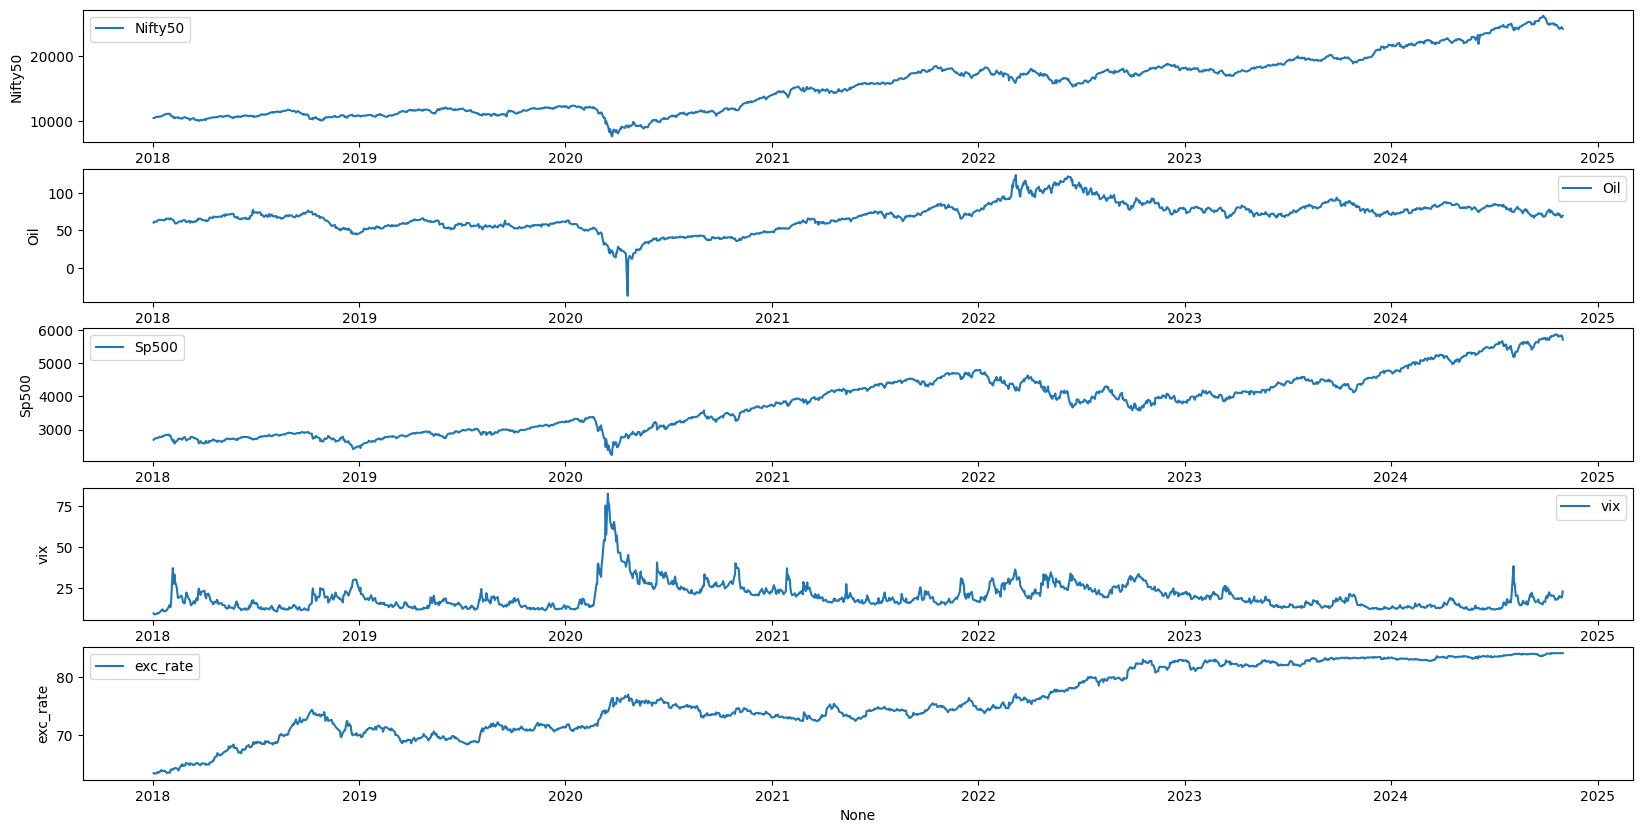

In [ ]:
fig,ax=plt.subplots(5,1,figsize=(20,10))
sns.lineplot(x=df.index,y=df['Nifty50'],label='Nifty50',ax=ax[0])
sns.lineplot(x=df.index,y=df['Oil'],label='Oil',ax=ax[1])
sns.lineplot(x=df.index,y=df['Sp500'],label='Sp500',ax=ax[2])
sns.lineplot(x=df.index,y=df['vix'],label='vix',ax=ax[3])
sns.lineplot(x=df.index,y=df['exc_rate'],label='exc_rate',ax=ax[4])
plt.show()

It can be seen that nifty50, sp500 and oil all have similar kind of relationships and vix is inversely proportional to all three. At the same time, the exchange rate seems to move along with the VIX

# Check for stationarity

###Nifty50

In [ ]:
print('p-value:',adfuller(df['Nifty50'])[1])

p-value: 0.9756912998287113


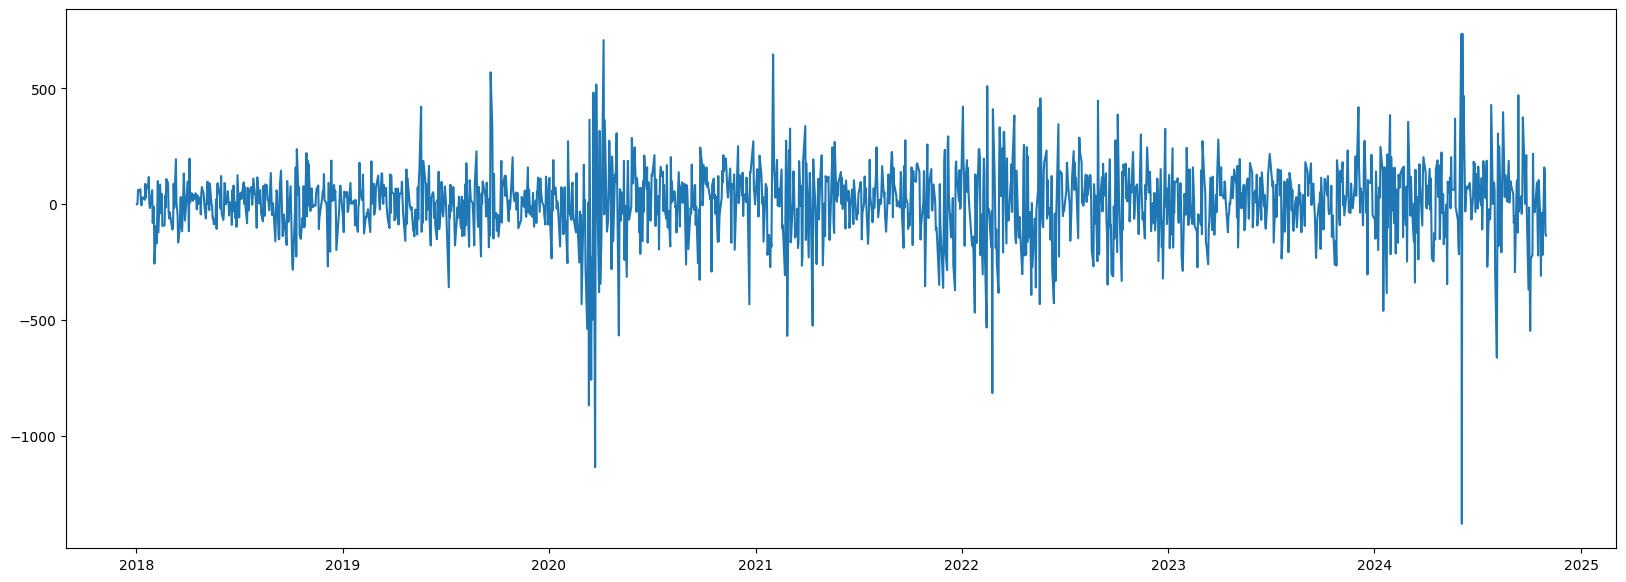

In [ ]:
first_diff=df['Nifty50'].diff(periods=1)
first_diff[pd.to_datetime('2018-01-02')]=0
first_diff.head()
fig,ax=plt.subplots(figsize=(20,7))
plt.plot(first_diff)
plt.show()

In [ ]:
print('p-value:',adfuller(first_diff)[1])

p-value: 9.448916190171148e-23


First Difference is stationary

###Oil

In [ ]:
print('p-value:',adfuller(df['Oil'])[1])

p-value: 0.2642785823979878


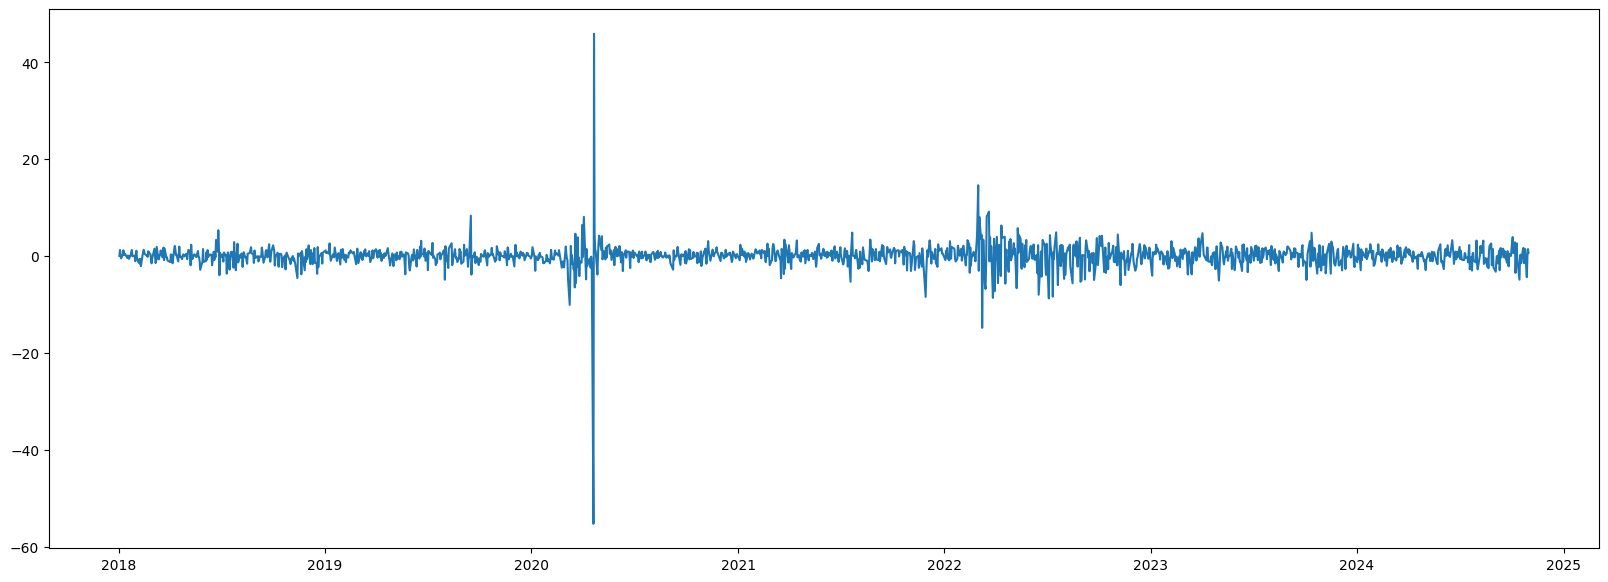

In [ ]:
first_diff=df['Oil'].diff(periods=1)
first_diff[pd.to_datetime('2018-01-02')]=0
first_diff.head()
fig,ax=plt.subplots(figsize=(20,7))
plt.plot(first_diff)
plt.show()

In [ ]:
print('p-value:',adfuller(first_diff)[1])

p-value: 2.3709701417771884e-13


First Difference is stationary

###Sp500

In [ ]:
print('p-value:',adfuller(df['Sp500'])[1])

p-value: 0.9518883250906682


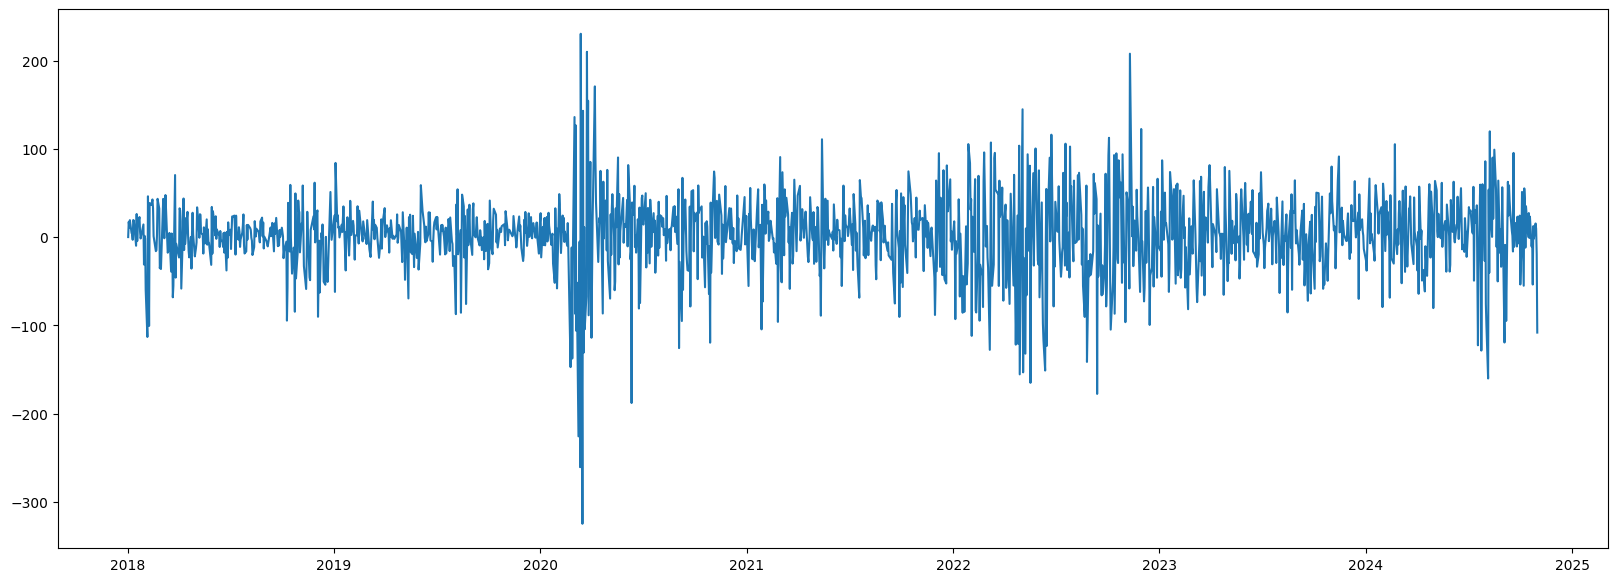

In [ ]:
first_diff=df['Sp500'].diff(periods=1)
first_diff[pd.to_datetime('2018-01-02')]=0
first_diff.head()
fig,ax=plt.subplots(figsize=(20,7))
plt.plot(first_diff)
plt.show()

In [ ]:
print('p-value:',adfuller(first_diff)[1])

p-value: 0.0


First Difference is stationary

###VIX

In [ ]:
print('p-value:',adfuller(df['vix'])[1])

p-value: 0.0025101548273188845


Series is stationary

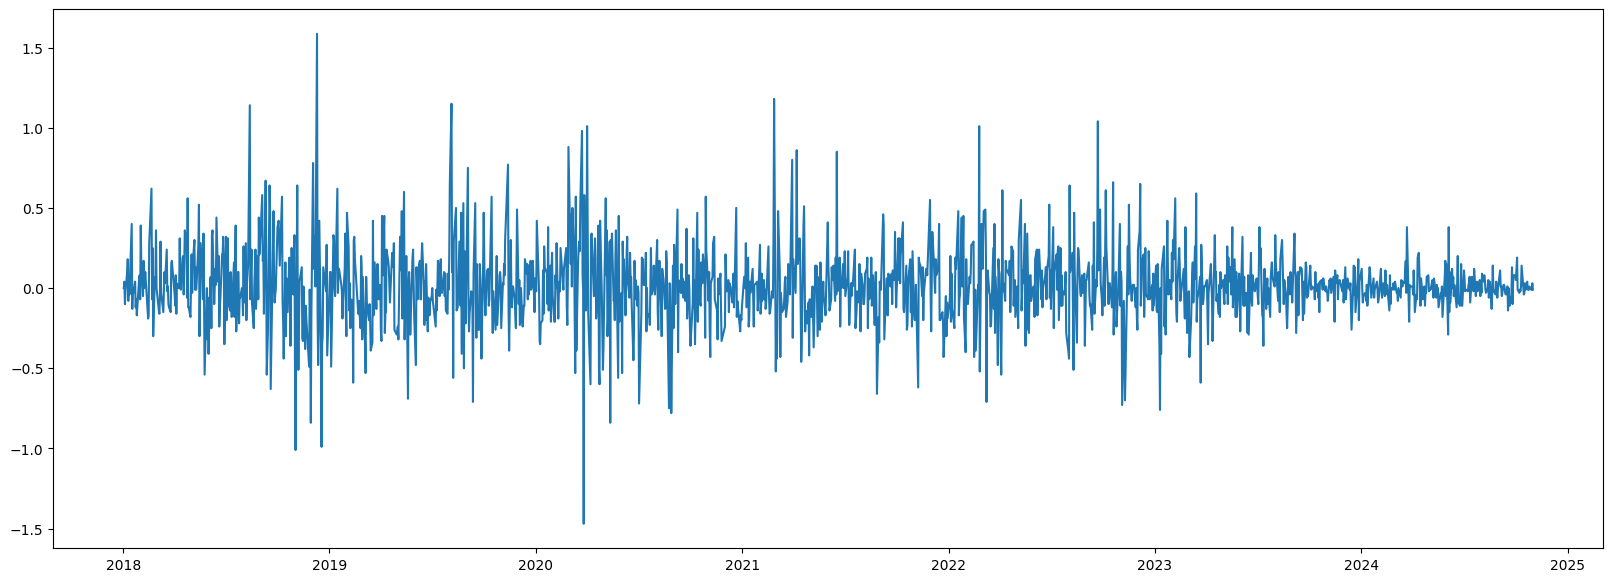

In [ ]:
first_diff=df.exc_rate.diff()
first_diff[pd.to_datetime('2018-01-02')]=0
first_diff.head()
fig,ax=plt.subplots(figsize=(20,7))
plt.plot(first_diff)
plt.show()

In [ ]:
print('p-value:',adfuller(first_diff)[1])

p-value: 2.6014481787537315e-27


First difference is stationary

###Exchange Rate

In [ ]:
statistic=adfuller(df.exc_rate)
print('p-value:',statistic[1])

p-value: 0.48199750501866073


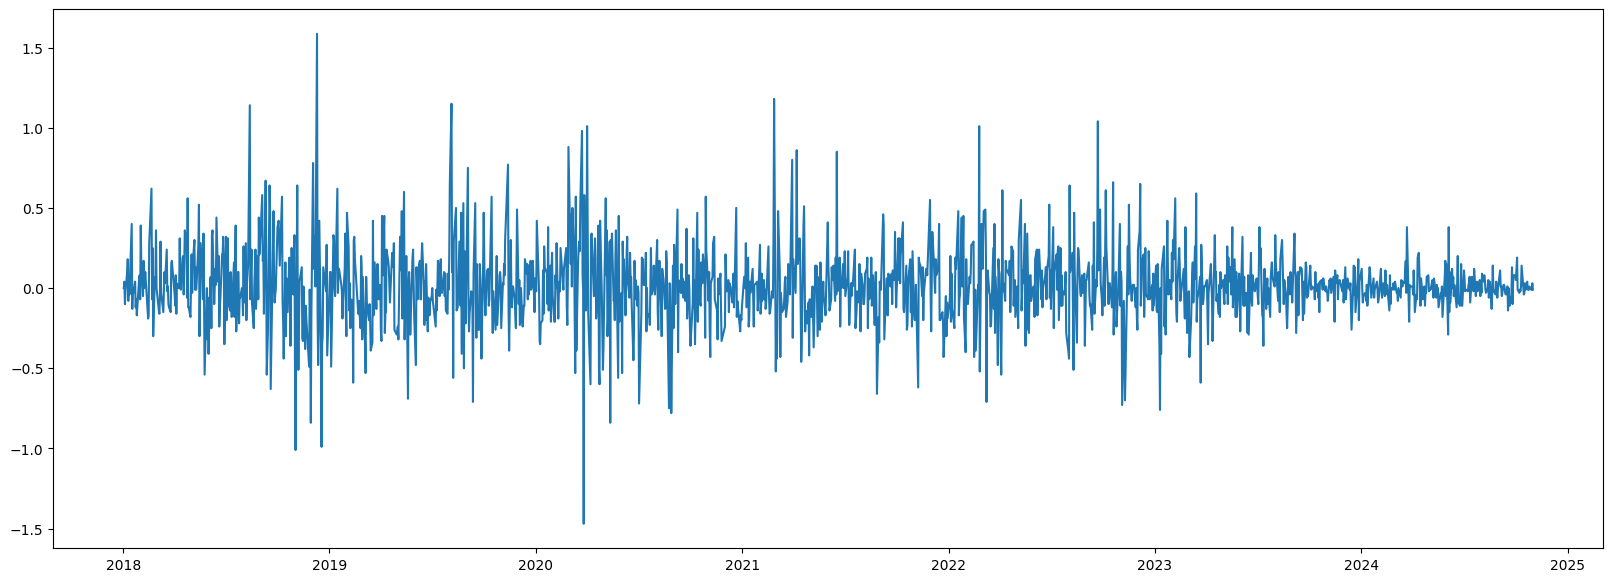

In [ ]:
first_diff=df.exc_rate.diff()
first_diff[pd.to_datetime('2018-01-02')]=0
first_diff.head()
fig,ax=plt.subplots(figsize=(20,7))
plt.plot(first_diff)
plt.show()

In [ ]:
print('p-value:',adfuller(first_diff)[1])

p-value: 2.6014481787537315e-27


First Difference is stationary

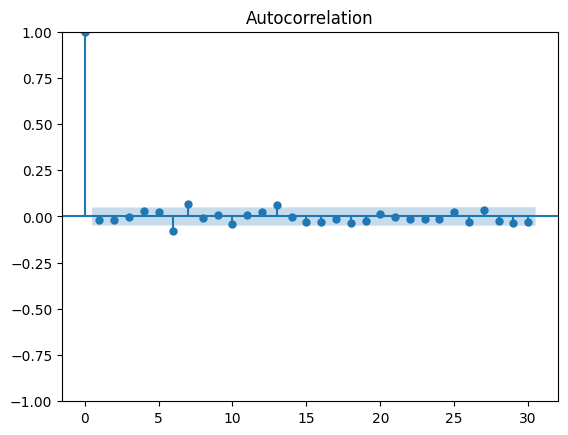

In [ ]:
plot_acf(first_diff,lags=30)
plt.show()

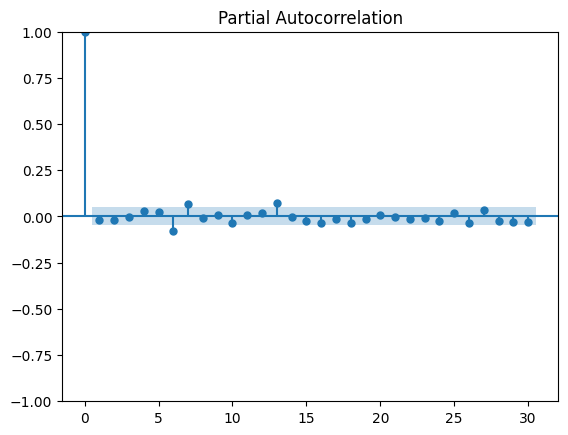

In [ ]:
plot_pacf(first_diff,lags=30)
plt.show()

#Splitting Data

In [ ]:
train_end=pd.to_datetime('2024-09-30')
train=df[:train_end+pd.Timedelta(days=1)]
test=df[train_end+pd.Timedelta(days=1):]
train.shape,test.shape

((1593, 5), (21, 5))

In [ ]:
train

,Nifty50,Oil,Sp500,vix,exc_rate
2018-01-02,10442.20,60.37,2695.81,9.77,63.46
2018-01-03,10443.20,61.61,2713.06,9.15,63.50
2018-01-04,10504.80,61.98,2723.99,9.22,63.40
2018-01-05,10558.85,61.49,2743.15,9.22,63.38
2018-01-08,10623.60,61.73,2747.71,9.52,63.48
...,...,...,...,...,...
2024-09-25,26004.15,70.42,5722.26,15.41,83.56
2024-09-26,26216.05,68.28,5745.37,15.37,83.60
2024-09-27,26178.95,68.72,5738.17,16.96,83.68
2024-09-30,25810.85,68.75,5762.48,16.73,83.76


#Model Fitting

In [ ]:
results_df=pd.DataFrame(columns=['Method','RMSE'])
results_df

,Method,RMSE


##ARIMA

In [ ]:
model=ARIMA(train.exc_rate,order=(7,1,7))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               exc_rate   No. Observations:                 1593
Model:                 ARIMA(7, 1, 7)   Log Likelihood                  15.746
Date:                Fri, 03 Jan 2025   AIC                             -1.491
Time:                        11:22:38   BIC                             79.100
Sample:                             0   HQIC                            28.443
                               - 1593                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4353      0.252     -1.725      0.085      -0.930       0.059
ar.L2         -0.7059      0.186     -3.787      0.000      -1.071      -0.341
ar.L3         -1.1304      0.206     -5.487      0.000      -1.534      -0.727
ar.L4         -0.7744      0.315     -2.456      0.014      -1.392      -0.156
ar.L5         -0.6254      0.192     -3.262      0.001      -1.001      -0.250
ar.L6         -0.5179      0.194     -2.668      0.008      -0.898      -0.137
ar.L7         -0.2878      0.181     -1.592      0.111      -0.642       0.067
ma.L1          0.4198      0.247      1.697      0.090      -0.065       0.905
ma.L2          0.6812      0.181      3.762      0.000       0.326       1.036
ma.L3          1.1106      0.194      5.710      0.000       0.729       1.492
ma.L4          0.7724      0.300      2.577      0.010       0.185       1.360
ma.L5          0.6282      0.180      3.485      0.000       0.275       0.982
ma.L6          0.4454      0.187      2.376      0.017       0.078       0.813
ma.L7          0.3603      0.162      2.227      0.026       0.043       0.677
sigma2         0.0573      0.001     43.969      0.000       0.055       0.060
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1119.02
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start_date = len(train)  # Use the length of the training data instead of the date.
end_date = len(train) + len(test) - 1 # Similarly, use length for the end date.
pred=model_fit.predict(start=start_date,end=end_date)
np.sqrt(mean_squared_error(test.exc_rate,pred))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


0.21645925385403905

In [ ]:
results_df=pd.concat([results_df,pd.DataFrame({'Method':['ARIMA'],'RMSE':[np.sqrt(mean_squared_error(test.exc_rate,pred))]})],ignore_index=True)
results_df

<ipython-input-290-f3447382557a>:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df=pd.concat([results_df,pd.DataFrame({'Method':['ARIMA'],'RMSE':[np.sqrt(mean_squared_error(test.exc_rate,pred))]})],ignore_index=True)


,Method,RMSE
0,ARIMA,0.216459


In [ ]:
pred

,predicted_mean
1593,83.794621
1594,83.814999
1595,83.804883
1596,83.809058
1597,83.799159
1598,83.806582
1599,83.812933
1600,83.813086
1601,83.804574
1602,83.802183


In [ ]:
test

,Nifty50,Oil,Sp500,vix,exc_rate
2024-10-01,25796.90,70.41,5708.75,19.26,83.81
2024-10-03,25250.10,74.33,5699.94,20.49,84.00
2024-10-04,25014.60,74.93,5751.07,19.21,83.99
2024-10-07,24795.75,77.76,5695.94,22.64,83.96
2024-10-08,25013.15,74.26,5751.13,21.42,83.95
2024-10-09,24981.95,73.85,5792.04,20.86,83.93
2024-10-10,24998.45,76.46,5780.05,20.93,83.94
2024-10-11,24964.25,76.11,5815.03,20.46,84.08
2024-10-15,25057.35,71.22,5815.26,20.64,84.04
2024-10-16,24971.30,70.97,5842.47,19.58,84.01


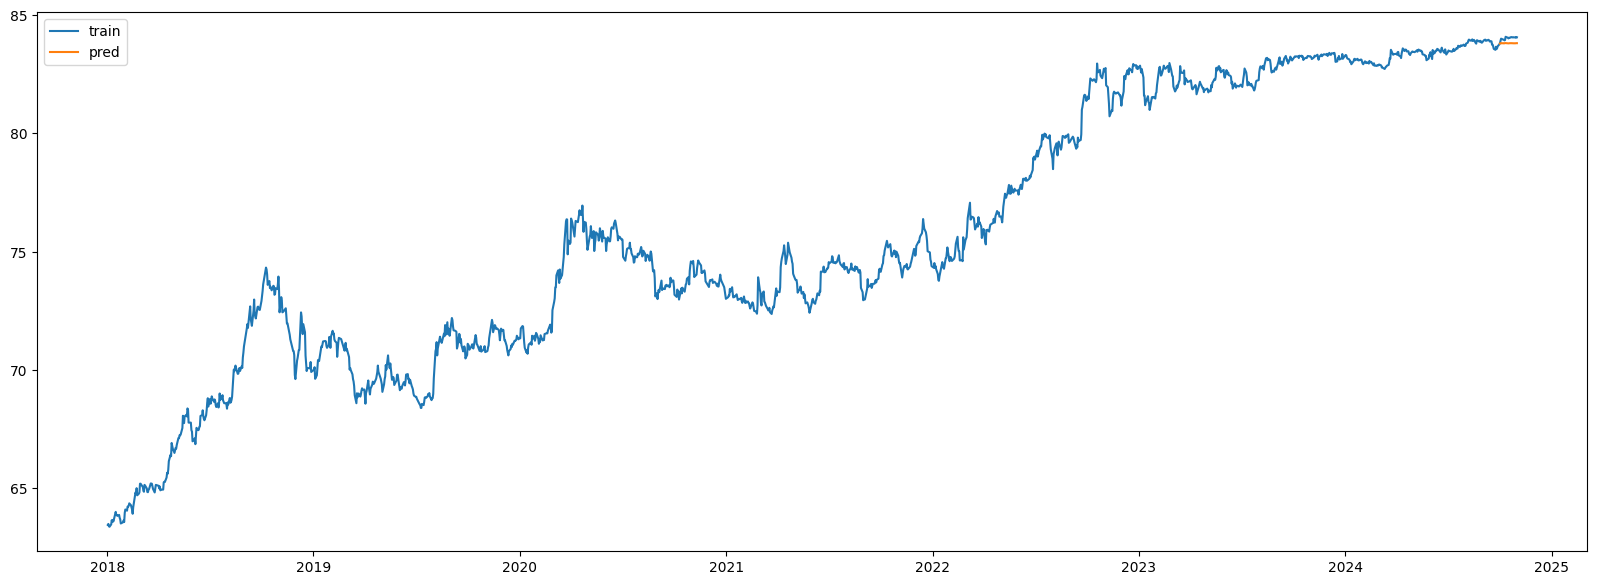

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(df.index,df.exc_rate,label='train')
plt.plot(test.index,pred,label='pred')
plt.legend()
plt.show()

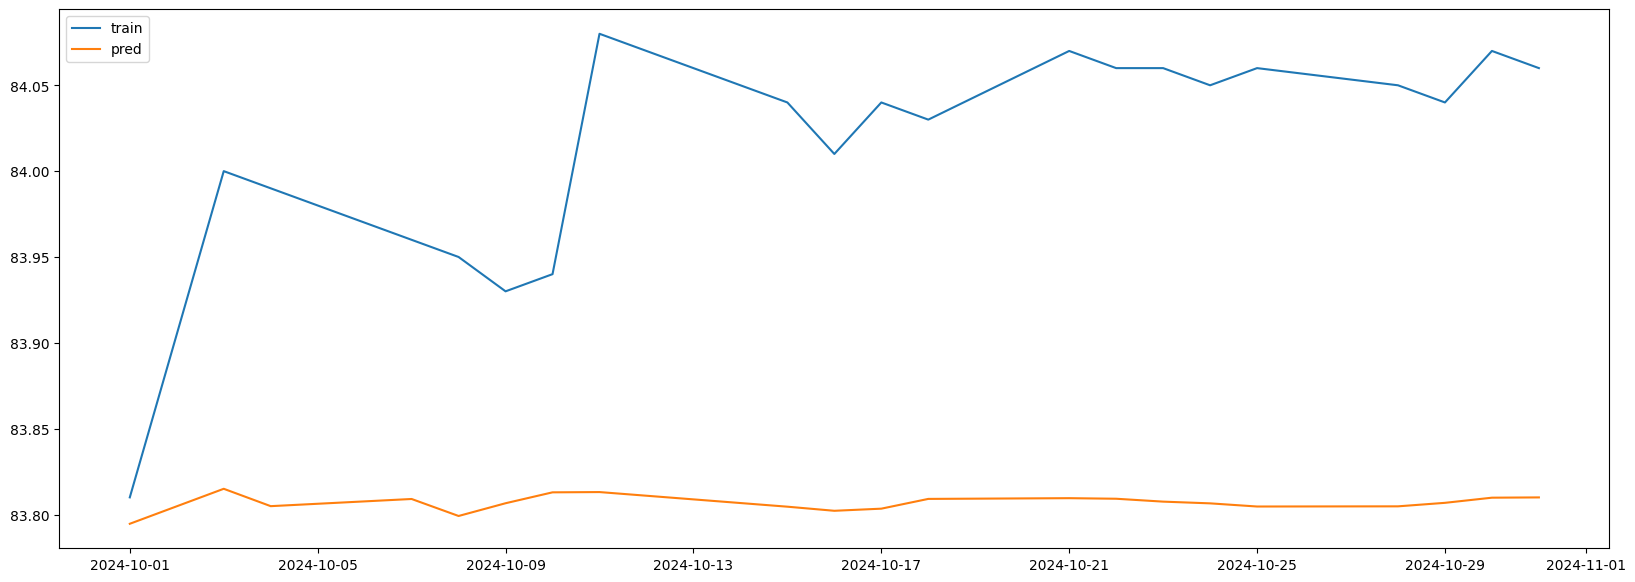

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(test.index,test.exc_rate,label='train')
plt.plot(test.index,pred,label='pred')
plt.legend()
plt.show()

In [ ]:
res=test.exc_rate.values-pred.values
res

array([0.01537922, 0.18500079, 0.18511745, 0.15094218, 0.15084137,
       0.12341831, 0.12706738, 0.26691417, 0.2354263 , 0.20781678,
       0.23657728, 0.2208926 , 0.26046862, 0.25079928, 0.25248168,
       0.24348507, 0.25532452, 0.24522347, 0.23318074, 0.26018332,
       0.25002563])

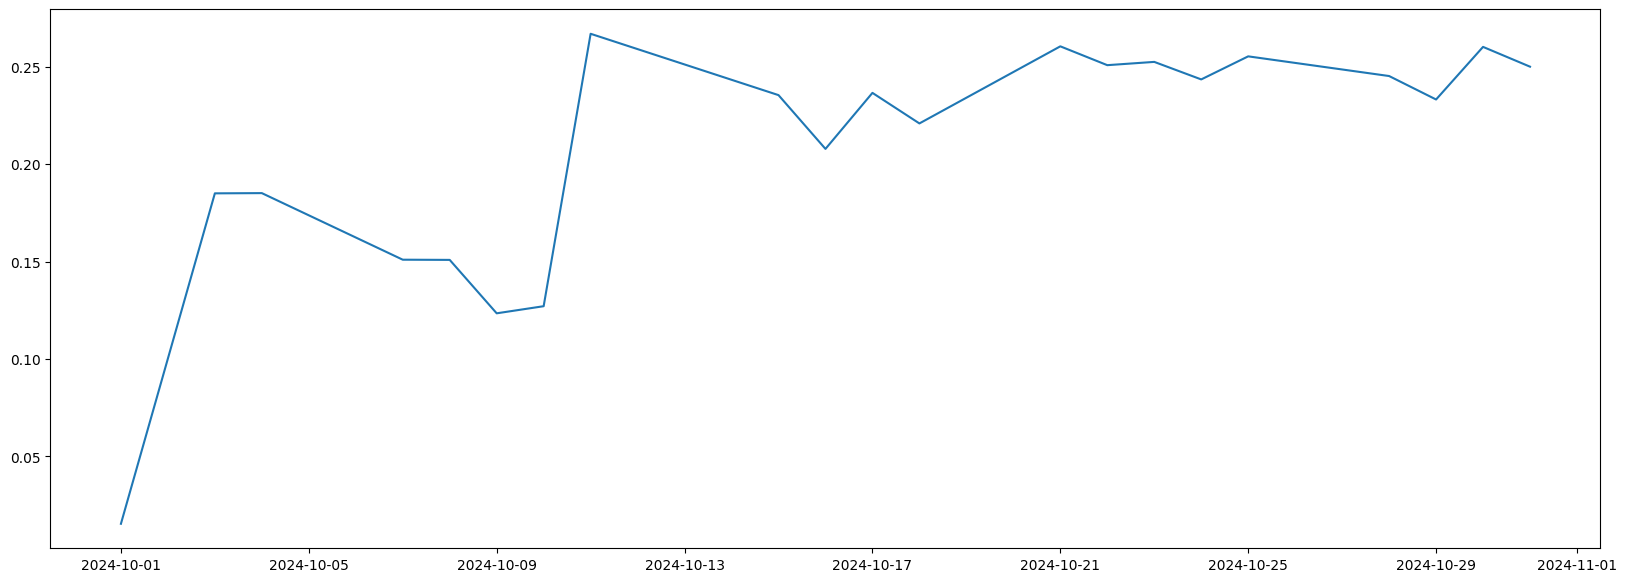

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(test.index,res)
plt.show()

It looks like there is heteroscedasticity in the residuals

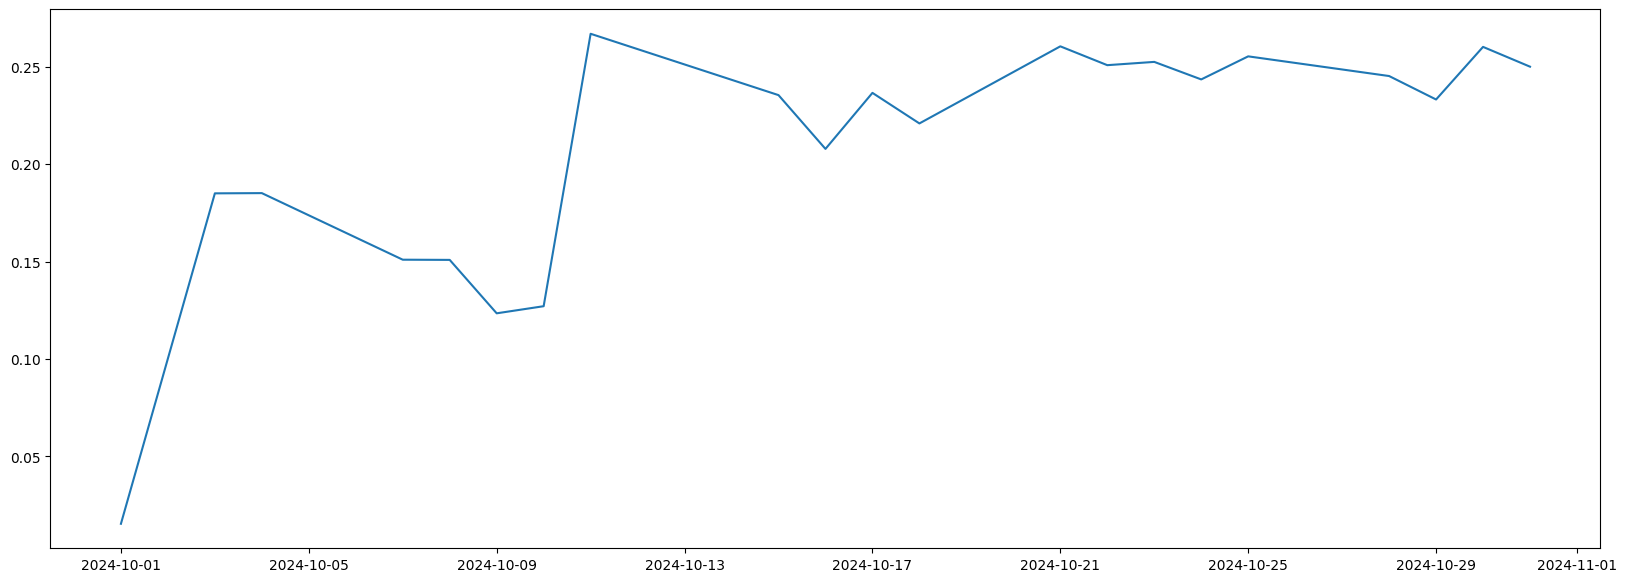

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(test.index,np.abs(res))
plt.show()

This kind of pattern is a good candidate for ARCH

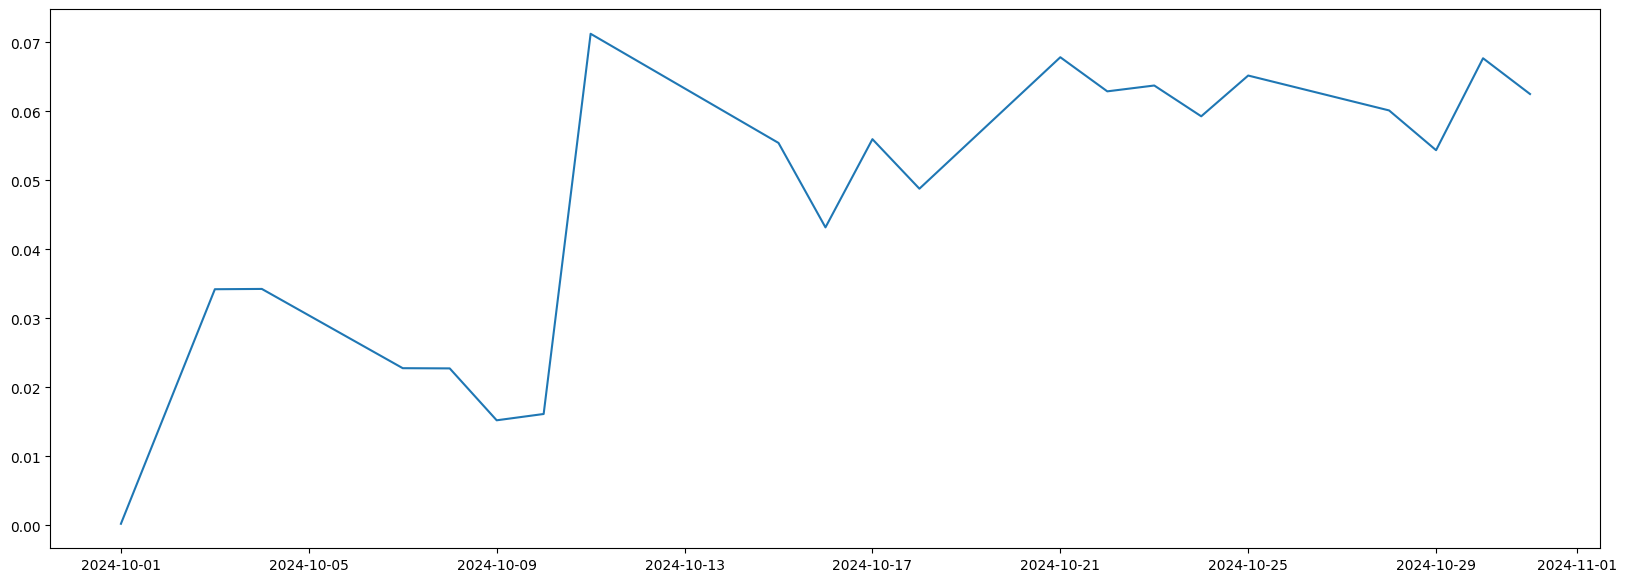

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(test.index,(res**2))
plt.show()

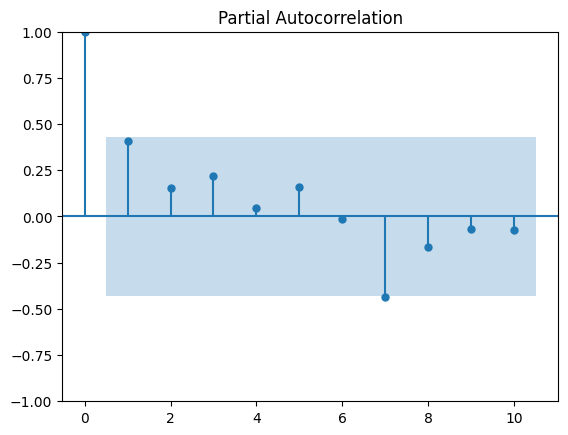

In [ ]:
plot_pacf(res)
plt.show()

##ARCH/GARCH model

Find for first difference

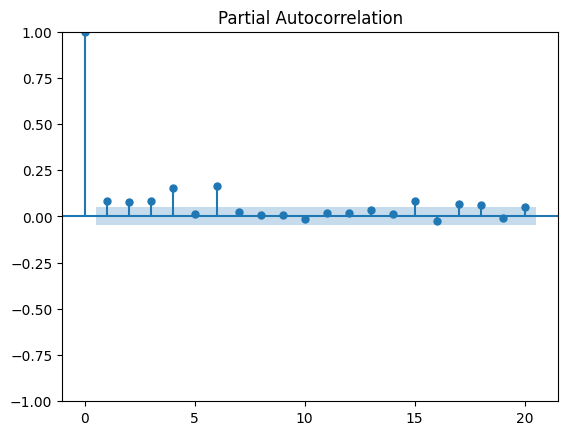

In [ ]:
first_diff=df.exc_rate.diff()
first_diff[pd.to_datetime('2018-01-02')]=0
first_diff.head()
plot_pacf(first_diff**2,lags=20)
plt.show()

In [ ]:
model=arch_model(first_diff,p=6,q=6)
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.05777. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     16,   Neg. LLF: 178081.0985535672
Iteration:      2,   Func. Count:     36,   Neg. LLF: 142439.0936520606
Iteration:      3,   Func. Count:     52,   Neg. LLF: 38.46223252494923
Iteration:      4,   Func. Count:     70,   Neg. LLF: -103.00756035392988
Iteration:      5,   Func. Count:     86,   Neg. LLF: -16.380408698318092
Iteration:      6,   Func. Count:    102,   Neg. LLF: -119.15711661497897
Iteration:      7,   Func. Count:    118,   Neg. LLF: -200.403080283343
Iteration:      8,   Func. Count:    134,   Neg. LLF: -171.7620208076917
Iteration:      9,   Func. Count:    150,   Neg. LLF: -199.92028577874368
Iteration:     10,   Func. Count:    166,   Neg. LLF: -194.5615418938176
Iteration:     11,   Func. Count:    182,   Neg. LLF: -171.3673259276258
Iteration:     12,   Func. Count:    199,   Neg. LLF: -202.70741185947549
Iteration:     13,   Func. Count:    215,   Neg. LLF: -188.79905345626133
Iteration:     14,   Func. Count:    232,   Neg. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               exc_rate   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                209.387
Distribution:                  Normal   AIC:                          -390.775
Method:            Maximum Likelihood   BIC:                          -315.373
                                        No. Observations:                 1613
Date:                Fri, Jan 03 2025   Df Residuals:                     1612
Time:                        11:22:45   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.1134e-03  4.740e-03      1.923  5.454e-02 [-1.775e-04,1.840e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.8688e-04  5.575e-04      0.515      0.607 [-8.058e-04,1.380e-03]
alpha[1]       0.1308  5.919e-02      2.210  2.711e-02    [1.479e-02,  0.247]
alpha[2]       0.0315      0.288      0.110      0.913      [ -0.532,  0.595]
alpha[3]       0.0229  4.557e-02      0.502      0.616   [-6.643e-02,  0.112]
alpha[4]       0.0230      0.142      0.162      0.871      [ -0.255,  0.301]
alpha[5]       0.0116  5.664e-02      0.204      0.838   [-9.944e-02,  0.123]
alpha[6]       0.0000  2.618e-02      0.000      1.000 [-5.130e-02,5.130e-02]
beta[1]        0.0000      1.857      0.000      1.000      [ -3.640,  3.640]
beta[2]        0.0000      0.735      0.000      1.000      [ -1.441,  1.441]
beta[3]        0.0000      0.917      0.000      1.000      [ -1.797,  1.797]
beta[4]        0.0000      0.151      0.000      1.000      [ -0.295,  0.295]
beta[5]        0.4760      0.401      1.188      0.235      [ -0.310,  1.261]
beta[6]        0.3042      0.628      0.485      0.628      [ -0.926,  1.534]
=============================================================================

Covariance estimator: robust
"""

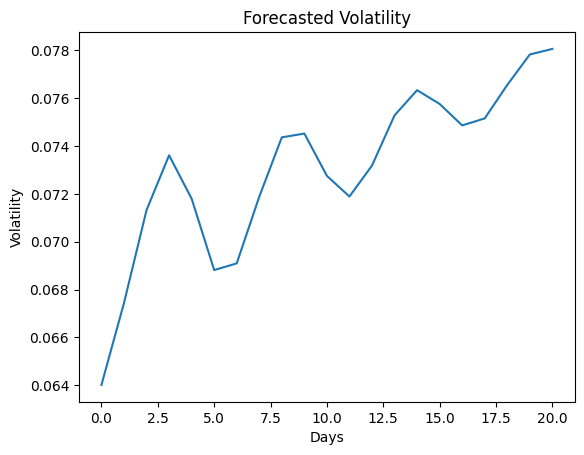

In [ ]:
pred=model_fit.forecast(horizon=len(test))
predicted_volatility = np.sqrt(pred.variance.values[-1, :])
plt.plot(predicted_volatility)
plt.title("Forecasted Volatility")
plt.xlabel("Days")
plt.ylabel("Volatility")
plt.show()

In [ ]:
model=ARIMA(train.exc_rate,order=(7,1,7))
model_fit=model.fit()
start_date = len(train)  # Use the length of the training data instead of the date.
end_date = len(train) + len(test) - 1 # Similarly, use length for the end date.
forecast_mean=model_fit.predict(start=start_date,end=end_date)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

In [ ]:
forecasted_values = forecast_mean + np.random.normal(0, predicted_volatility)
np.sqrt(mean_squared_error(test.exc_rate,forecasted_values))

0.23595901137507183

In [ ]:
results_df=pd.concat([results_df,pd.DataFrame({'Method':['Garch'],'RMSE':[np.sqrt(mean_squared_error(test.exc_rate,forecasted_values))]})],ignore_index=True)
results_df

,Method,RMSE
0,ARIMA,0.216459
1,Garch,0.235959


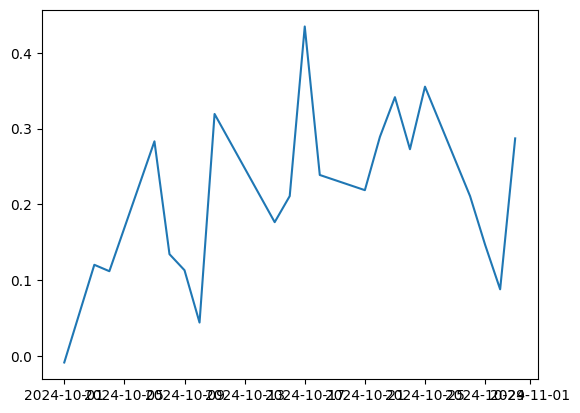

In [ ]:
res=test.exc_rate.values-forecasted_values
plt.plot(test.index,res)
plt.show()

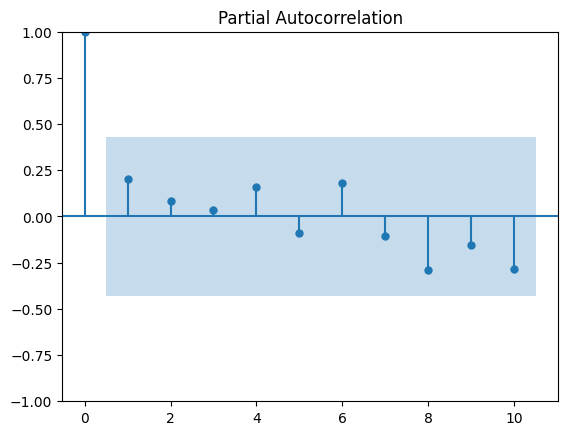

In [ ]:
plot_pacf(res)
plt.show()

In [ ]:
model=arch_model(first_diff,p=6,o=0,q=6)
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.05777. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     16,   Neg. LLF: 178081.0985535672
Iteration:      2,   Func. Count:     36,   Neg. LLF: 142439.0936520606
Iteration:      3,   Func. Count:     52,   Neg. LLF: 38.46223252494923
Iteration:      4,   Func. Count:     70,   Neg. LLF: -103.00756035392988
Iteration:      5,   Func. Count:     86,   Neg. LLF: -16.380408698318092
Iteration:      6,   Func. Count:    102,   Neg. LLF: -119.15711661497897
Iteration:      7,   Func. Count:    118,   Neg. LLF: -200.403080283343
Iteration:      8,   Func. Count:    134,   Neg. LLF: -171.7620208076917
Iteration:      9,   Func. Count:    150,   Neg. LLF: -199.92028577874368
Iteration:     10,   Func. Count:    166,   Neg. LLF: -194.5615418938176
Iteration:     11,   Func. Count:    182,   Neg. LLF: -171.3673259276258
Iteration:     12,   Func. Count:    199,   Neg. LLF: -202.70741185947549
Iteration:     13,   Func. Count:    215,   Neg. LLF: -188.79905345626133
Iteration:     14,   Func. Count:    232,   Neg. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:               exc_rate   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                209.387
Distribution:                  Normal   AIC:                          -390.775
Method:            Maximum Likelihood   BIC:                          -315.373
                                        No. Observations:                 1613
Date:                Fri, Jan 03 2025   Df Residuals:                     1612
Time:                        11:23:03   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.1134e-03  4.740e-03      1.923  5.454e-02 [-1.775e-04,1.840e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.8688e-04  5.575e-04      0.515      0.607 [-8.058e-04,1.380e-03]
alpha[1]       0.1308  5.919e-02      2.210  2.711e-02    [1.479e-02,  0.247]
alpha[2]       0.0315      0.288      0.110      0.913      [ -0.532,  0.595]
alpha[3]       0.0229  4.557e-02      0.502      0.616   [-6.643e-02,  0.112]
alpha[4]       0.0230      0.142      0.162      0.871      [ -0.255,  0.301]
alpha[5]       0.0116  5.664e-02      0.204      0.838   [-9.944e-02,  0.123]
alpha[6]       0.0000  2.618e-02      0.000      1.000 [-5.130e-02,5.130e-02]
beta[1]        0.0000      1.857      0.000      1.000      [ -3.640,  3.640]
beta[2]        0.0000      0.735      0.000      1.000      [ -1.441,  1.441]
beta[3]        0.0000      0.917      0.000      1.000      [ -1.797,  1.797]
beta[4]        0.0000      0.151      0.000      1.000      [ -0.295,  0.295]
beta[5]        0.4760      0.401      1.188      0.235      [ -0.310,  1.261]
beta[6]        0.3042      0.628      0.485      0.628      [ -0.926,  1.534]
=============================================================================

Covariance estimator: robust
"""

##VAR model

In [ ]:
df_stat=pd.DataFrame()

In [ ]:
first_diff=df['Nifty50'].diff(periods=1)
first_diff[pd.to_datetime('2018-01-02')]=0
df_stat['Nifty50']=first_diff

In [ ]:
first_diff=df['Oil'].diff(periods=1)
first_diff[pd.to_datetime('2018-01-02')]=0
df_stat['Oil']=first_diff

In [ ]:
first_diff=df['Sp500'].diff(periods=1)
first_diff[pd.to_datetime('2018-01-02')]=0
df_stat['Sp500']=first_diff

In [ ]:
first_diff=df['vix'].diff(periods=1)
first_diff[pd.to_datetime('2018-01-02')]=0
df_stat['vix']=first_diff

In [ ]:
first_diff=df['exc_rate'].diff(periods=1)
first_diff[pd.to_datetime('2018-01-02')]=0
df_stat['exc_rate']=first_diff

In [ ]:
df_stat.head()

,Nifty50,Oil,Sp500,vix,exc_rate
2018-01-02,0.00,0.00,0.00,0.00,0.00
2018-01-03,1.00,1.24,17.25,-0.62,0.04
2018-01-04,61.60,0.37,10.93,0.07,-0.10
2018-01-05,54.05,-0.49,19.16,0.00,-0.02
2018-01-08,64.75,0.24,4.56,0.30,0.10


####Correlation with exchange rates

In [ ]:
for lag in range(1,23):
  s1=df_stat['exc_rate'].iloc[lag:]
  s2=df_stat['Nifty50'].iloc[:-lag]
  print('lag:',lag)
  print(pearsonr(s1,s2))
  print('---')

lag: 1
PearsonRResult(statistic=0.003827069012912264, pvalue=0.8779747211436112)
---
lag: 2
PearsonRResult(statistic=-0.023460535310052072, pvalue=0.34668419252813665)
---
lag: 3
PearsonRResult(statistic=0.017233671119224244, pvalue=0.4895580352028633)
---
lag: 4
PearsonRResult(statistic=-0.07810062669364357, pvalue=0.0017176388664242655)
---
lag: 5
PearsonRResult(statistic=0.00982126068875168, pvalue=0.6939247035518703)
---
lag: 6
PearsonRResult(statistic=0.033508241135299585, pvalue=0.17940470472189696)
---
lag: 7
PearsonRResult(statistic=-0.06855634121949795, pvalue=0.00598712876838143)
---
lag: 8
PearsonRResult(statistic=0.01511467782786875, pvalue=0.5451166468521612)
---
lag: 9
PearsonRResult(statistic=-0.007805781894482091, pvalue=0.7547499500416309)
---
lag: 10
PearsonRResult(statistic=0.001707786823623375, pvalue=0.9455291545508824)
---
lag: 11
PearsonRResult(statistic=-0.011218166442941642, pvalue=0.6536692478888908)
---
lag: 12
PearsonRResult(statistic=-0.012632505140269411, 

In [ ]:
for lag in range(1,23):
  s1=df_stat['exc_rate'].iloc[lag:]
  s2=df_stat['Oil'].iloc[:-lag]
  print('lag:',lag)
  print(pearsonr(s1,s2))
  print('---')

lag: 1
PearsonRResult(statistic=0.004219470773753459, pvalue=0.865576478109898)
---
lag: 2
PearsonRResult(statistic=-0.0035600183065079526, pvalue=0.8864647708660108)
---
lag: 3
PearsonRResult(statistic=0.04973489978871354, pvalue=0.04601147171733787)
---
lag: 4
PearsonRResult(statistic=-0.027340236010628335, pvalue=0.27306412183448986)
---
lag: 5
PearsonRResult(statistic=-0.04052859617925323, pvalue=0.10424881534692469)
---
lag: 6
PearsonRResult(statistic=0.004484283469087191, pvalue=0.8574475184534115)
---
lag: 7
PearsonRResult(statistic=0.03125276235793779, pvalue=0.2106489994450555)
---
lag: 8
PearsonRResult(statistic=0.04124819730122806, pvalue=0.09855096833489191)
---
lag: 9
PearsonRResult(statistic=-0.07156172768586243, pvalue=0.004137451560760315)
---
lag: 10
PearsonRResult(statistic=0.025605800216334906, pvalue=0.30557082840487626)
---
lag: 11
PearsonRResult(statistic=-0.08750540438763912, pvalue=0.00045421718549539935)
---
lag: 12
PearsonRResult(statistic=0.01565021127377068,

In [ ]:
for lag in range(1,23):
  s1=df_stat['exc_rate'].iloc[lag:]
  s2=df_stat['Sp500'].iloc[:-lag]
  print('lag:',lag)
  print(pearsonr(s1,s2))
  print('---')

lag: 1
PearsonRResult(statistic=-0.021825337019080942, pvalue=0.38119002986582756)
---
lag: 2
PearsonRResult(statistic=-0.009151607479339104, pvalue=0.713586895875365)
---
lag: 3
PearsonRResult(statistic=0.021040921006825423, pvalue=0.3988367665271256)
---
lag: 4
PearsonRResult(statistic=-0.012375088237982952, pvalue=0.6198753680511012)
---
lag: 5
PearsonRResult(statistic=0.007027780304783504, pvalue=0.7782522021260083)
---
lag: 6
PearsonRResult(statistic=0.032693698135023666, pvalue=0.19021753660629975)
---
lag: 7
PearsonRResult(statistic=-0.07439263502824843, pvalue=0.002853516690269654)
---
lag: 8
PearsonRResult(statistic=0.007254434119304626, pvalue=0.7715042729767199)
---
lag: 9
PearsonRResult(statistic=-0.06035868229680611, pvalue=0.015619665719983442)
---
lag: 10
PearsonRResult(statistic=0.017510832881235092, pvalue=0.48355487580660766)
---
lag: 11
PearsonRResult(statistic=-0.0204835540753094, pvalue=0.41261521243098037)
---
lag: 12
PearsonRResult(statistic=-0.04006208026377807,

In [ ]:
for lag in range(1,23):
  s1=df_stat['exc_rate'].iloc[lag:]
  s2=df_stat['vix'].iloc[:-lag]
  print('lag:',lag)
  print(pearsonr(s1,s2))
  print('---')

lag: 1
PearsonRResult(statistic=0.007518632003687084, pvalue=0.7629256984964923)
---
lag: 2
PearsonRResult(statistic=0.002533453190441225, pvalue=0.9190685309638902)
---
lag: 3
PearsonRResult(statistic=0.01204585280835958, pvalue=0.6291102037149711)
---
lag: 4
PearsonRResult(statistic=0.053374155902665, pvalue=0.03228818649917983)
---
lag: 5
PearsonRResult(statistic=0.00948486823364558, pvalue=0.703904728063475)
---
lag: 6
PearsonRResult(statistic=-0.02222874324342979, pvalue=0.3731924953565743)
---
lag: 7
PearsonRResult(statistic=0.04003277414472808, pvalue=0.10877923677393952)
---
lag: 8
PearsonRResult(statistic=-0.0473827156514648, pvalue=0.0577152137564353)
---
lag: 9
PearsonRResult(statistic=0.08539889794042206, pvalue=0.0006174910659848974)
---
lag: 10
PearsonRResult(statistic=-0.06087195840378692, pvalue=0.014788421836590675)
---
lag: 11
PearsonRResult(statistic=0.0576213956955431, pvalue=0.021087614775309512)
---
lag: 12
PearsonRResult(statistic=0.031085155914389012, pvalue=0.2

###Training

In [ ]:
train_end=pd.to_datetime('2024-09-30')
train_stat=df_stat[:train_end+pd.Timedelta(days=1)]
test_stat=df_stat[train_end+pd.Timedelta(days=1):]
train_stat.shape,test_stat.shape

((1593, 5), (21, 5))

In [ ]:
model=VAR(train_stat)
model_fit=model.fit(maxlags=10)
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 03, Jan, 2025
Time:                     11:23:04
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    17.8596
Nobs:                     1583.00    HQIC:                   17.3163
Log likelihood:          -24427.5    FPE:                2.40389e+07
AIC:                      16.9951    Det(Omega_mle):     2.05144e+07
--------------------------------------------------------------------
Results for equation Nifty50
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                8.766678         3.947256            2.221           0.026
L1.Nifty50          -0.156387         0.027488           -5.689           0.000
L1.Oil               2.004996         1.526885            1.31

In [ ]:
pred=pd.DataFrame(model_fit.forecast(train_stat.values[-17:],len(test)))[4].cumsum()+test.exc_rate[0]

<ipython-input-322-3ff959b89cc8>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred=pd.DataFrame(model_fit.forecast(train_stat.values[-17:],len(test)))[4].cumsum()+test.exc_rate[0]


In [ ]:
res=model_fit.resid['exc_rate'].values

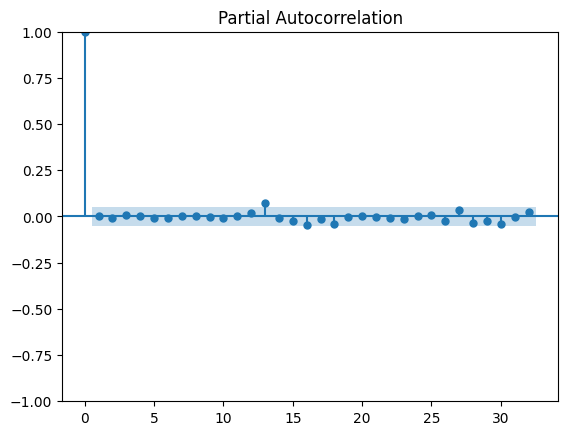

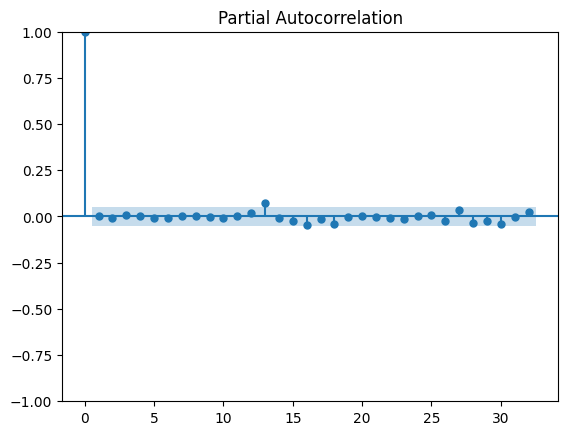

In [ ]:
plot_pacf(res)

In [ ]:
np.sqrt(mean_squared_error(test.exc_rate,pred))

0.053497627577684566

In [ ]:
results_df=pd.concat([results_df,pd.DataFrame({'Method':['VAR'],'RMSE':[np.sqrt(mean_squared_error(test.exc_rate,pred))]})],ignore_index=True)
results_df

,Method,RMSE
0,ARIMA,0.216459
1,Garch,0.235959
2,VAR,0.053498


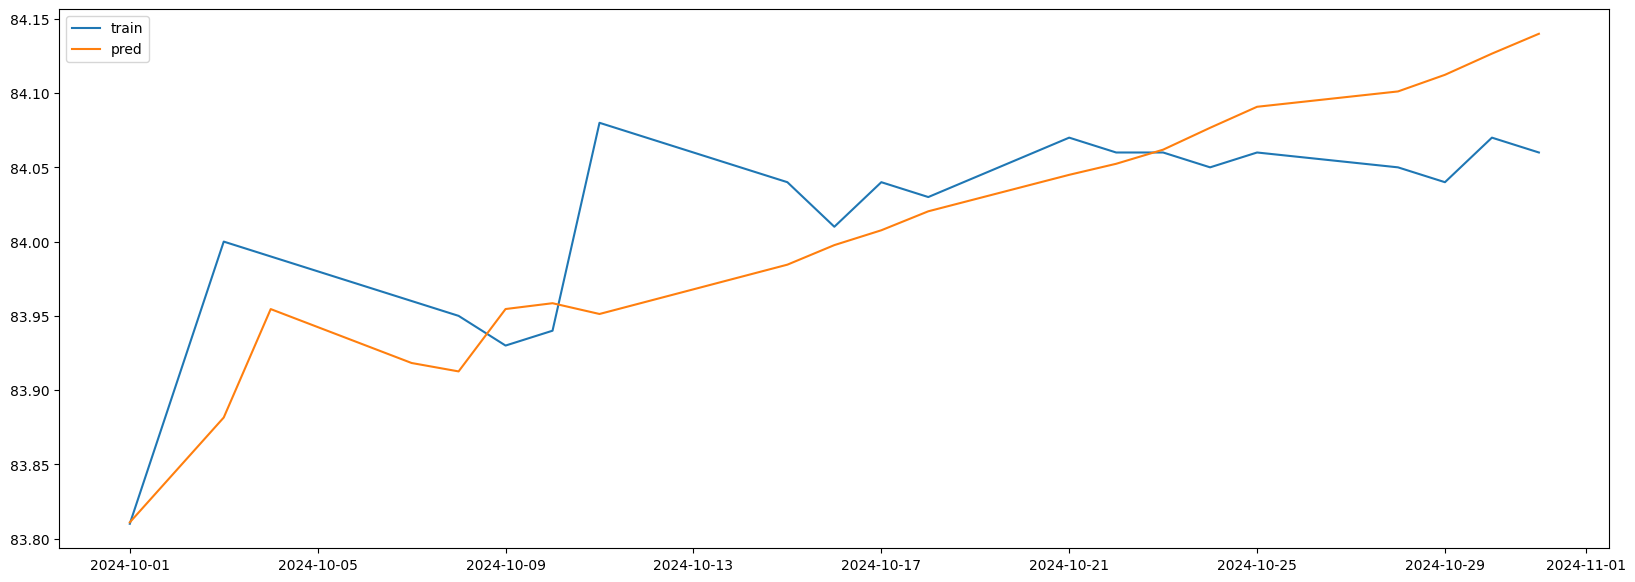

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(test.index,test.exc_rate,label='train')
plt.plot(test.index,pred,label='pred')
plt.legend()
plt.show()

##Granger Causality Test

In [ ]:
gc=grangercausalitytests(df_stat[['vix','exc_rate']],maxlag=17)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3531  , p=0.2449  , df_denom=1609, df_num=1
ssr based chi2 test:   chi2=1.3556  , p=0.2443  , df=1
likelihood ratio test: chi2=1.3551  , p=0.2444  , df=1
parameter F test:         F=1.3531  , p=0.2449  , df_denom=1609, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0080  , p=0.3652  , df_denom=1606, df_num=2
ssr based chi2 test:   chi2=2.0222  , p=0.3638  , df=2
likelihood ratio test: chi2=2.0209  , p=0.3640  , df=2
parameter F test:         F=1.0080  , p=0.3652  , df_denom=1606, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9020  , p=0.1273  , df_denom=1603, df_num=3
ssr based chi2 test:   chi2=5.7308  , p=0.1255  , df=3
likelihood ratio test: chi2=5.7206  , p=0.1260  , df=3
parameter F test:         F=1.9020  , p=0.1273  , df_denom=1603, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6345  , p=0.

In [ ]:
gc=grangercausalitytests(df_stat[['Nifty50','exc_rate']],maxlag=17)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.7953  , p=0.0092  , df_denom=1609, df_num=1
ssr based chi2 test:   chi2=6.8080  , p=0.0091  , df=1
likelihood ratio test: chi2=6.7936  , p=0.0091  , df=1
parameter F test:         F=6.7953  , p=0.0092  , df_denom=1609, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6189  , p=0.0270  , df_denom=1606, df_num=2
ssr based chi2 test:   chi2=7.2604  , p=0.0265  , df=2
likelihood ratio test: chi2=7.2441  , p=0.0267  , df=2
parameter F test:         F=3.6189  , p=0.0270  , df_denom=1606, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4388  , p=0.0629  , df_denom=1603, df_num=3
ssr based chi2 test:   chi2=7.3483  , p=0.0616  , df=3
likelihood ratio test: chi2=7.3316  , p=0.0620  , df=3
parameter F test:         F=2.4388  , p=0.0629  , df_denom=1603, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8795  , p=0.

In [ ]:
gc=grangercausalitytests(df_stat[['Oil','exc_rate']],maxlag=17)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0257  , p=0.8727  , df_denom=1609, df_num=1
ssr based chi2 test:   chi2=0.0257  , p=0.8726  , df=1
likelihood ratio test: chi2=0.0257  , p=0.8726  , df=1
parameter F test:         F=0.0257  , p=0.8727  , df_denom=1609, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.8699  , p=0.1545  , df_denom=1606, df_num=2
ssr based chi2 test:   chi2=3.7515  , p=0.1532  , df=2
likelihood ratio test: chi2=3.7471  , p=0.1536  , df=2
parameter F test:         F=1.8699  , p=0.1545  , df_denom=1606, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3308  , p=0.2627  , df_denom=1603, df_num=3
ssr based chi2 test:   chi2=4.0099  , p=0.2604  , df=3
likelihood ratio test: chi2=4.0049  , p=0.2609  , df=3
parameter F test:         F=1.3308  , p=0.2627  , df_denom=1603, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0909  , p=0.

In [ ]:
gc=grangercausalitytests(df_stat[['Sp500','exc_rate']],maxlag=17)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3830  , p=0.5361  , df_denom=1609, df_num=1
ssr based chi2 test:   chi2=0.3838  , p=0.5356  , df=1
likelihood ratio test: chi2=0.3837  , p=0.5356  , df=1
parameter F test:         F=0.3830  , p=0.5361  , df_denom=1609, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4607  , p=0.6309  , df_denom=1606, df_num=2
ssr based chi2 test:   chi2=0.9244  , p=0.6299  , df=2
likelihood ratio test: chi2=0.9241  , p=0.6300  , df=2
parameter F test:         F=0.4607  , p=0.6309  , df_denom=1606, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3149  , p=0.2679  , df_denom=1603, df_num=3
ssr based chi2 test:   chi2=3.9619  , p=0.2656  , df=3
likelihood ratio test: chi2=3.9570  , p=0.2661  , df=3
parameter F test:         F=1.3149  , p=0.2679  , df_denom=1603, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2090  , p=0.

##RandomForest Regressor

In [ ]:
df1=df.copy()

In [ ]:
df1['vix5']=df.vix.shift(5)
df1['n1']=df.Nifty50.shift(1)
df1['n2']=df.Nifty50.shift(2)
df1.head(7)

,Nifty50,Oil,Sp500,vix,exc_rate,vix5,n1,n2
2018-01-02,10442.20,60.37,2695.81,9.77,63.46,NaN,NaN,NaN
2018-01-03,10443.20,61.61,2713.06,9.15,63.50,NaN,10442.20,NaN
2018-01-04,10504.80,61.98,2723.99,9.22,63.40,NaN,10443.20,10442.20
2018-01-05,10558.85,61.49,2743.15,9.22,63.38,NaN,10504.80,10443.20
2018-01-08,10623.60,61.73,2747.71,9.52,63.48,NaN,10558.85,10504.80
2018-01-09,10637.00,62.92,2751.29,10.08,63.66,9.77,10623.60,10558.85
2018-01-10,10632.20,63.60,2748.23,9.82,63.58,9.15,10637.00,10623.60


In [ ]:
df1.fillna(0,inplace=True)
df1.head()

,Nifty50,Oil,Sp500,vix,exc_rate,vix5,n1,n2
2018-01-02,10442.20,60.37,2695.81,9.77,63.46,0.0,0.00,0.0
2018-01-03,10443.20,61.61,2713.06,9.15,63.50,0.0,10442.20,0.0
2018-01-04,10504.80,61.98,2723.99,9.22,63.40,0.0,10443.20,10442.2
2018-01-05,10558.85,61.49,2743.15,9.22,63.38,0.0,10504.80,10443.2
2018-01-08,10623.60,61.73,2747.71,9.52,63.48,0.0,10558.85,10504.8


In [ ]:
train_end=pd.to_datetime('2024-09-30')
train=df1[:train_end+pd.Timedelta(days=1)]
test=df1[train_end+pd.Timedelta(days=1):]
train.shape,test.shape

((1593, 8), (21, 8))

In [ ]:
rf=RandomForestRegressor(random_state=2)
rf.fit(train.drop(columns=['exc_rate']),train.exc_rate)
ypred=rf.predict(test.drop(columns=['exc_rate']))
mean_squared_error(test.exc_rate,ypred)

0.03985502333333287

In [ ]:
params={
    'n_estimators':[50,100,200],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':[0.5,0.75,1],
    'bootstrap':[True,False]
}
grid=GridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1,verbose=1,scoring='neg_root_mean_squared_error')
grid.fit(train.drop(columns=['exc_rate']),train.exc_rate)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'max_features': [0.5, 0.75, 1],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [ ]:
ypred=grid.predict(test.drop(columns=['exc_rate']))
np.sqrt(mean_squared_error(test.exc_rate,ypred))

0.36325073567740407

In [ ]:
rf=RandomForestRegressor(n_estimators=50,max_depth=10,random_state=2,max_features=0.5,bootstrap=True)
rf.fit(train.drop(columns=['exc_rate']),train.exc_rate)
ypred=rf.predict(test.drop(columns=['exc_rate']))
np.sqrt(mean_squared_error(test.exc_rate,ypred))

0.19197991337304923

In [ ]:
results_df=pd.concat([results_df,pd.DataFrame({'Method':['Random Forest'],'RMSE':[np.sqrt(mean_squared_error(test.exc_rate,ypred))]})],ignore_index=True)
results_df

,Method,RMSE
0,ARIMA,0.216459
1,Garch,0.235959
2,VAR,0.053498
3,Random Forest,0.191980


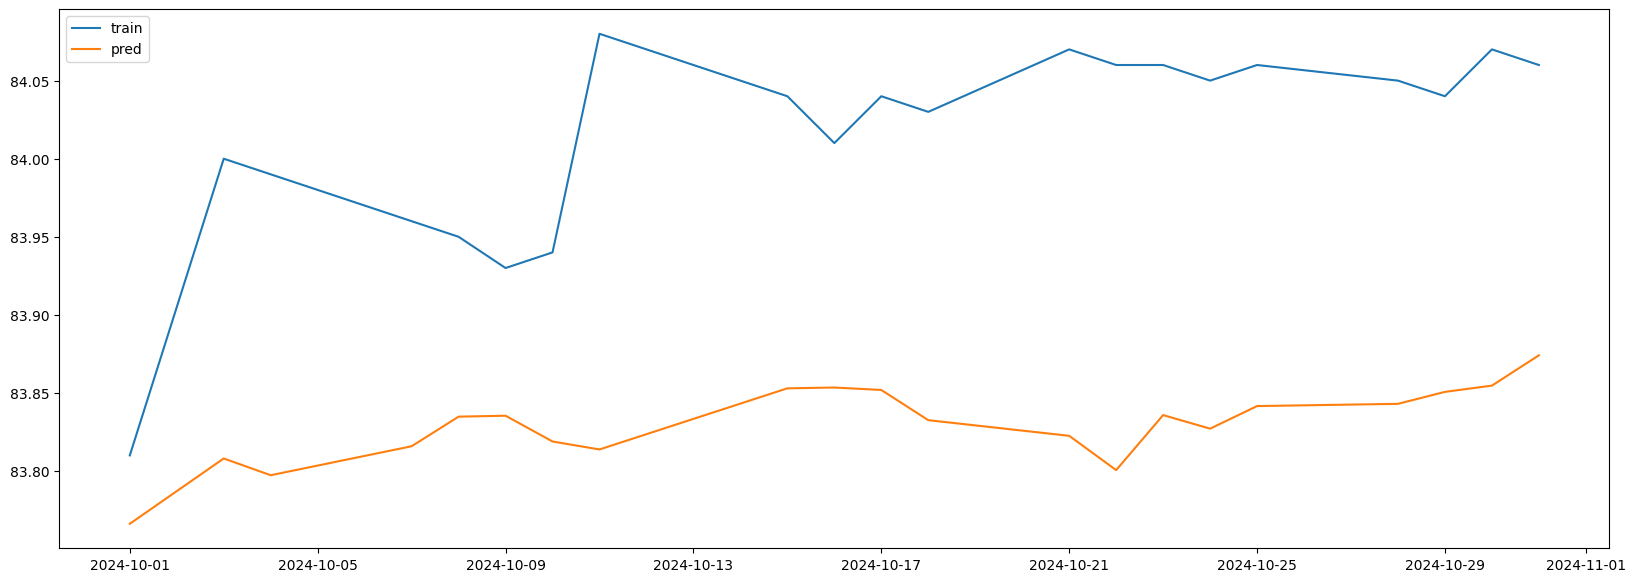

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(test.index,test.exc_rate,label='train')
plt.plot(test.index,ypred,label='pred')
plt.legend()
plt.show()

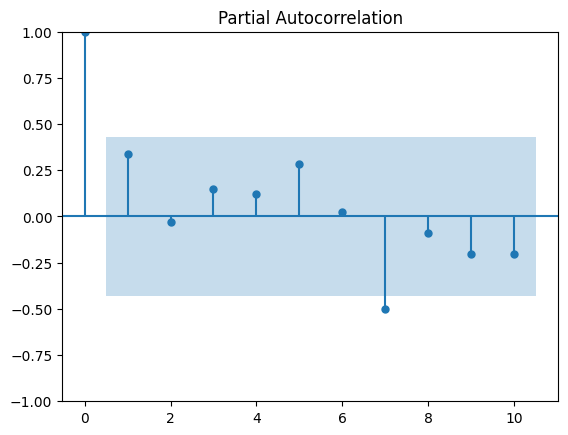

In [ ]:
res=test.exc_rate.values-ypred
plot_pacf(res)
plt.show()

##Gradient Boosting Algorithm

In [ ]:
df1=df.copy()

In [ ]:
df1['vix5']=df.vix.shift(5)
df1['n1']=df.Nifty50.shift(1)
df1['n2']=df.Nifty50.shift(2)
df1.head(7)

,Nifty50,Oil,Sp500,vix,exc_rate,vix5,n1,n2
2018-01-02,10442.20,60.37,2695.81,9.77,63.46,NaN,NaN,NaN
2018-01-03,10443.20,61.61,2713.06,9.15,63.50,NaN,10442.20,NaN
2018-01-04,10504.80,61.98,2723.99,9.22,63.40,NaN,10443.20,10442.20
2018-01-05,10558.85,61.49,2743.15,9.22,63.38,NaN,10504.80,10443.20
2018-01-08,10623.60,61.73,2747.71,9.52,63.48,NaN,10558.85,10504.80
2018-01-09,10637.00,62.92,2751.29,10.08,63.66,9.77,10623.60,10558.85
2018-01-10,10632.20,63.60,2748.23,9.82,63.58,9.15,10637.00,10623.60


In [ ]:
df1.fillna(0,inplace=True)
df1.head()

,Nifty50,Oil,Sp500,vix,exc_rate,vix5,n1,n2
2018-01-02,10442.20,60.37,2695.81,9.77,63.46,0.0,0.00,0.0
2018-01-03,10443.20,61.61,2713.06,9.15,63.50,0.0,10442.20,0.0
2018-01-04,10504.80,61.98,2723.99,9.22,63.40,0.0,10443.20,10442.2
2018-01-05,10558.85,61.49,2743.15,9.22,63.38,0.0,10504.80,10443.2
2018-01-08,10623.60,61.73,2747.71,9.52,63.48,0.0,10558.85,10504.8


In [ ]:
train_end=pd.to_datetime('2024-09-30')
train=df1[:train_end+pd.Timedelta(days=1)]
test=df1[train_end+pd.Timedelta(days=1):]
train.shape,test.shape

((1593, 8), (21, 8))

In [ ]:
gb=GradientBoostingRegressor()
params={
    'n_estimators':[50,100,200],
    'learning_rate':[0.01,0.1,1],
    'max_depth':[3,5,8],
    'subsample':[0.5,0.75,1]
}
grid=GridSearchCV(gb,param_grid=params,cv=5,n_jobs=-1,verbose=1,scoring='neg_root_mean_squared_error')
grid.fit(df1.drop(columns=['exc_rate']),df1.exc_rate)
grid.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}

In [ ]:
gb=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=5,subsample=0.75,random_state=2)
gb.fit(train.drop(columns=['exc_rate']),train.exc_rate)
ypred=gb.predict(test.drop(columns=['exc_rate']))
np.sqrt(mean_squared_error(test.exc_rate,ypred))

0.16325462552980144

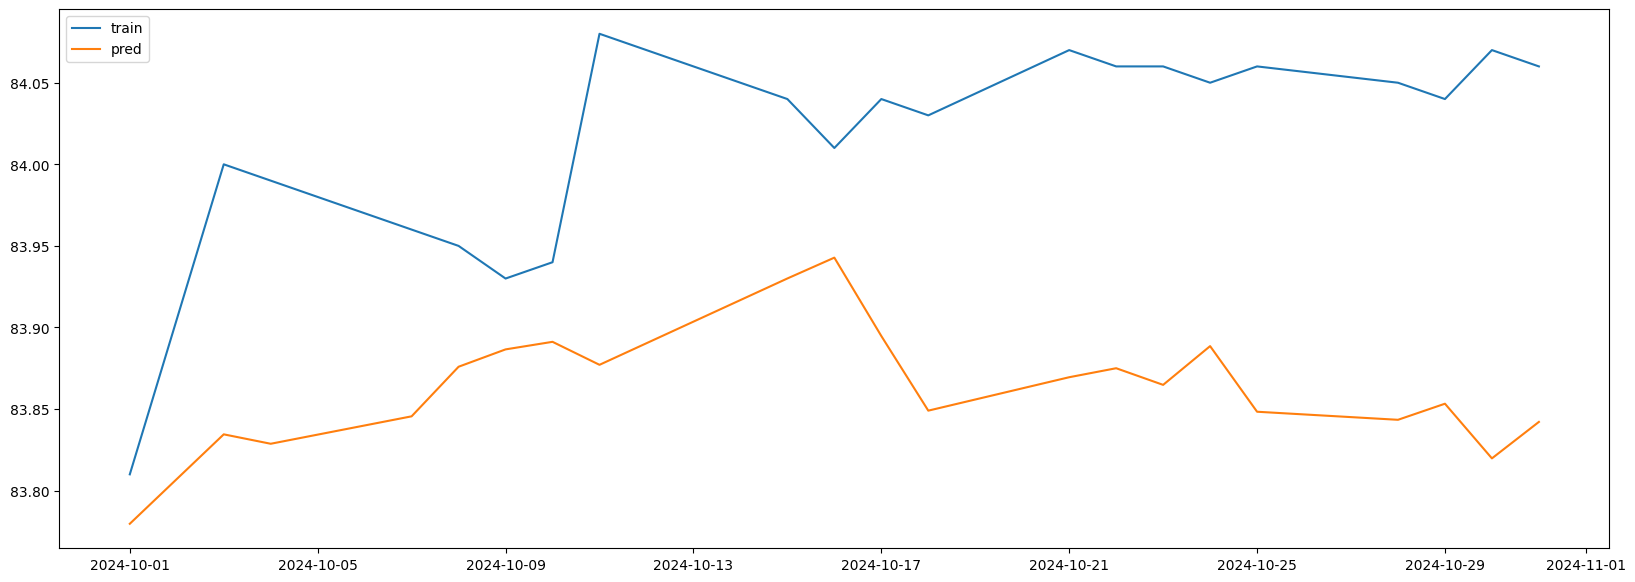

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(test.index,test.exc_rate,label='train')
plt.plot(test.index,ypred,label='pred')
plt.legend()
plt.show()

In [ ]:
results_df=pd.concat([results_df,pd.DataFrame({'Method':['Gardient Boosting'],'RMSE':[np.sqrt(mean_squared_error(test.exc_rate,ypred))]})],ignore_index=True)
results_df

,Method,RMSE
0,ARIMA,0.216459
1,Garch,0.235959
2,VAR,0.053498
3,Random Forest,0.191980
4,Gardient Boosting,0.163255


In [ ]:
test.shape

(21, 8)

##HYBRID MODEL- ARIMA FOR LINEAR COMPONENT AND NEURAL NETWORK FOR THE RESIDUAL

In [ ]:
model=ARIMA(df.exc_rate,order=(7,1,7))
model_fit=model.fit()
forecast_mean=model_fit.predict(start=0,end=len(df)-1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
residuals=df.exc_rate-forecast_mean

In [ ]:
X = residuals[:-1]
y = residuals[1:]
X = pd.Series(X, index=residuals.index[:-1])
y = pd.Series(y, index=residuals.index[1:])

In [ ]:
X.shape,y.shape

((1612,), (1612,))

In [ ]:
train_end=pd.to_datetime('2024-09-30')
train_x=X[:train_end+pd.Timedelta(days=0)].values.reshape(-1,1)
test_x=X[train_end+pd.Timedelta(days=0):].values.reshape(-1,1)
train_y=y[:train_end+pd.Timedelta(days=1)].values.reshape(-1,1)
test_y=y[train_end+pd.Timedelta(days=1):].values.reshape(-1,1)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((1592, 1), (21, 1), (1592, 1), (21, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error (MSE): 0.0034


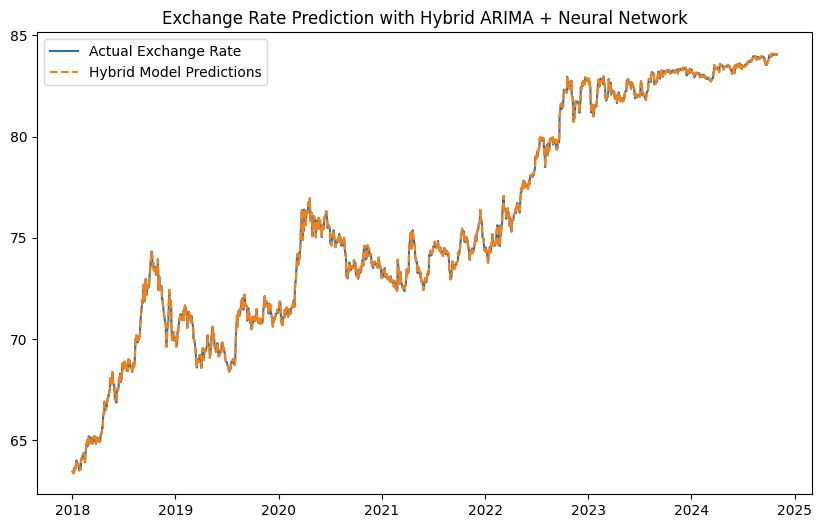

In [ ]:
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
nn_model.fit(train_x, train_y)

# Step 8: Neural Network Predictions on Residuals
nn_predictions = nn_model.predict(test_x)

# Step 9: Combine ARIMA and Neural Network predictions
# Reconstruct the full residuals prediction
full_nn_predictions = np.concatenate([residuals[:len(train_x)], nn_predictions])

# Final prediction: Combine ARIMA and Neural Network predictions
final_predictions = forecast_mean + full_nn_predictions

# Step 10: Evaluate the model
mae = mean_squared_error(df['exc_rate'][len(train_x):], final_predictions[len(train_x):])
print(f'Mean Squared Error (MSE): {mae:.4f}')

# Step 11: Visualize the predictions vs actual data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['exc_rate'], label='Actual Exchange Rate')
plt.plot(df.index, final_predictions, label='Hybrid Model Predictions', linestyle='--')
plt.legend()
plt.title('Exchange Rate Prediction with Hybrid ARIMA + Neural Network')
plt.show()

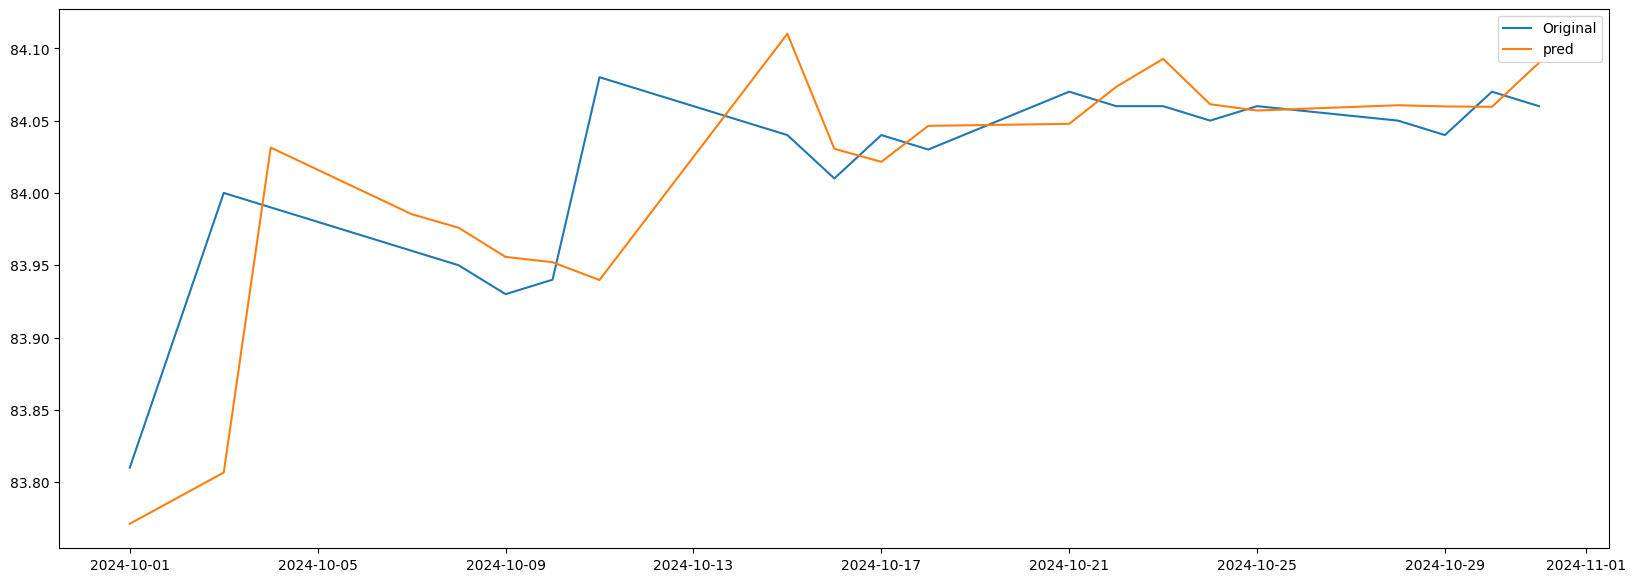

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(test.index,test.exc_rate,label='Original')
plt.plot(test.index,
         forecast_mean[train_end+pd.Timedelta(days=1):]+nn_predictions,label='pred')
plt.legend()
plt.show()

In [ ]:
ypred=forecast_mean[train_end+pd.Timedelta(days=1):]+nn_predictions
mean_squared_error(test.exc_rate,ypred)

0.0034148322842537143

In [ ]:
results_df=pd.concat([results_df,pd.DataFrame({'Method':['Hybrid'],'RMSE':[np.sqrt(mean_squared_error(test.exc_rate,ypred))]})],ignore_index=True)
results_df

,Method,RMSE
0,ARIMA,0.216459
1,Garch,0.235959
2,VAR,0.053498
3,Random Forest,0.191980
4,Gardient Boosting,0.163255
5,Hybrid,0.058437
